# **Original Dataset**

## **Data collection**

###**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics as state
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import pickle
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tabulate import tabulate

### **Importing Dataset**

In [ ]:
data = pd.read_csv('/content/thyroid.csv')
data.head()

Age sex thyroxine queryonthyroxine onantithyroidmedication sick pregnant  \
0   12   F         f                f                       f    f        f   
1   20   M         f                f                       f    f        f   
2   46   M         f                f                       f    f        f   
3   70   F         t                f                       f    f        f   
4   70   F         f                f                       f    f        f   

  thyroidsurgery I131treatment queryhypothyroid  ... TT4measured     T4  \
0              f             f                f  ...           t  125.0   
1              f             f                f  ...           t  102.0   
2              f             f                f  ...           t  109.0   
3              f             f                f  ...           t  175.0   
4              f             f                f  ...           t   61.0   

  T4Umeasured   T4U FTImeasured    FTI TBGmeasured  TBG referral source  \
0           t  1.14           t  109.0           f  NaN            SVHC   
1           f  0.00           f    0.0           f  NaN           other   
2           t  0.91           t  120.0           f  NaN           other   
3           f  0.00           f    0.0           f  NaN           other   
4           t  0.87           t   70.0           f  NaN             SVI   

   Result  
0       P  
1       P  
2       P  
3       P  
4       P  

[5 rows x 30 columns]

### **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

In [ ]:
# shape of the dataset
data.shape

(3770, 30)

In [ ]:
# size of the dataset
data.size

113100

In [ ]:
# Viewing the dataset Columns
data.describe()

Age          TSH           T3           T4          T4U  \
count  3770.000000  3770.000000  3770.000000  3770.000000  3770.000000   
mean     51.724934     4.591025     1.603008   101.678462     0.892921   
std      20.097915    23.345886     1.097207    43.192637     0.354295   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      36.000000     0.200000     0.900000    84.000000     0.840000   
50%      54.000000     1.200000     1.800000   102.000000     0.950000   
75%      67.000000     2.475000     2.200000   123.000000     1.070000   
max     455.000000   530.000000    10.600000   430.000000     2.320000   

               FTI  TBG  
count  3770.000000  0.0  
mean     99.176844  NaN  
std      45.851205  NaN  
min       0.000000  NaN  
25%      86.250000  NaN  
50%     104.000000  NaN  
75%     121.000000  NaN  
max     395.000000  NaN

In [ ]:
# Checking for the data types
data.dtypes

Age                          int64
sex                         object
thyroxine                   object
queryonthyroxine            object
onantithyroidmedication     object
sick                        object
pregnant                    object
thyroidsurgery              object
I131treatment               object
queryhypothyroid            object
queryhyperthyroid           object
lithium                     object
goitre                      object
tumor                       object
hypopituitary               object
psych                       object
TSHmeasured                 object
TSH                        float64
T3measured                  object
T3                         float64
TT4measured                 object
T4                         float64
T4Umeasured                 object
T4U                        float64
FTImeasured                 object
FTI                        float64
TBGmeasured                 object
TBG                        float64
referral source     

In [ ]:
data.columns

Index(['Age', 'sex', 'thyroxine', 'queryonthyroxine',
       'onantithyroidmedication', 'sick', 'pregnant', 'thyroidsurgery',
       'I131treatment', 'queryhypothyroid', 'queryhyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSHmeasured', 'TSH',
       'T3measured', 'T3', 'TT4measured', 'T4', 'T4Umeasured', 'T4U',
       'FTImeasured', 'FTI', 'TBGmeasured', 'TBG', 'referral source',
       'Result'],
      dtype='object')

### **Feature Engineering**

In [ ]:
data['Result'].unique()

array(['P', 'N'], dtype=object)

In [ ]:
data['Result'].value_counts()

Result
P    3479
N     291
Name: count, dtype: int64

<ipython-input-530-4e06a9895db3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Result', palette='Set2')


<Axes: xlabel='Result', ylabel='count'>

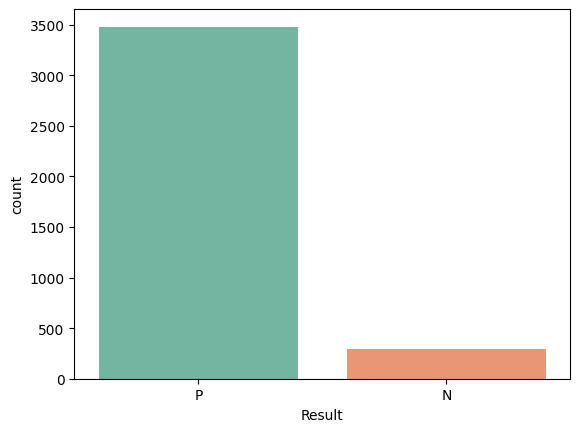

In [ ]:
sns.countplot(data=data, x='Result', palette='Set2')

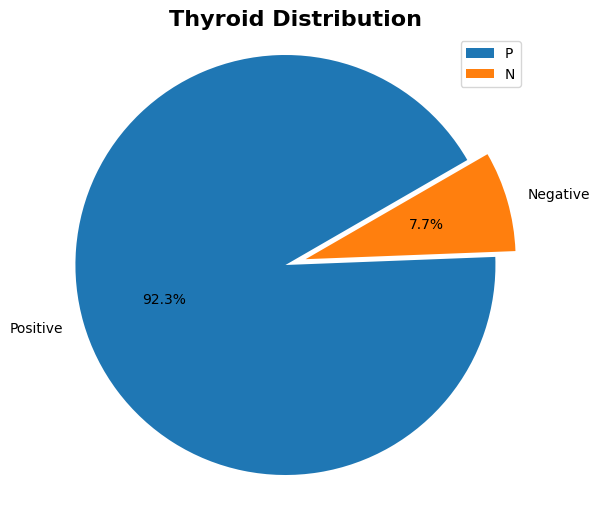

In [ ]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Result'].value_counts()['P']
    negative_count = data['Result'].value_counts()['N']
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Result'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

In [ ]:
# Create an empty list to store unique values
unique_values_list = []

# Iterate through each column in the dataset
for col in data.columns:
    # Get unique values for the current column
    unique_values = pd.unique(data[col])

    # Append the column name and its unique values to the list
    unique_values_list.append({'Column Name': col, 'Unique Values': unique_values})

# Create a DataFrame from the list of dictionaries
unique_values_df = pd.DataFrame(unique_values_list)

# Display the DataFrame
unique_values_df

Column Name                                      Unique Values
0                       Age  [12, 20, 46, 70, 18, 59, 80, 66, 68, 84, 67, 7...
1                       sex                                        [F, M, nan]
2                 thyroxine                                             [f, t]
3          queryonthyroxine                                             [f, t]
4   onantithyroidmedication                                             [f, t]
5                      sick                                             [f, t]
6                  pregnant                                             [f, t]
7            thyroidsurgery                                             [f, t]
8             I131treatment                                             [f, t]
9          queryhypothyroid                                             [f, t]
10        queryhyperthyroid                                             [f, t]
11                  lithium                                             [f, t]
12                   goitre                                             [f, t]
13                    tumor                                             [f, t]
14            hypopituitary                                             [f, t]
15                    psych                                             [f, t]
16              TSHmeasured                                             [t, f]
17                      TSH  [1.3, 4.1, 0.98, 0.16, 0.72, 0.03, 0.0, 2.2, 0...
18               T3measured                                             [t, f]
19                       T3  [2.5, 2.0, 0.0, 1.9, 1.2, 0.6, 2.2, 1.6, 3.8, ...
20              TT4measured                                             [t, f]
21                       T4  [125.0, 102.0, 109.0, 175.0, 61.0, 183.0, 72.0...
22              T4Umeasured                                             [t, f]
23                      T4U  [1.14, 0.0, 0.91, 0.87, 1.3, 0.92, 0.7, 0.93, ...
24              FTImeasured                                             [t, f]
25                      FTI  [109.0, 0.0, 120.0, 70.0, 141.0, 78.0, 115.0, ...
26              TBGmeasured                                                [f]
27                      TBG                                              [nan]
28          referral source                     [SVHC, other, SVI, STMW, SVHD]
29                   Result                                             [P, N]

## **Data Preprocessing**

### **Check Missing Values**

In [ ]:
data.isnull().sum()

Age                           0
sex                         150
thyroxine                     0
queryonthyroxine              0
onantithyroidmedication       0
sick                          0
pregnant                      0
thyroidsurgery                0
I131treatment                 0
queryhypothyroid              0
queryhyperthyroid             0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSHmeasured                   0
TSH                           0
T3measured                    0
T3                            0
TT4measured                   0
T4                            0
T4Umeasured                   0
T4U                           0
FTImeasured                   0
FTI                           0
TBGmeasured                   0
TBG                        3770
referral source               0
Result                        0
dtype: int64

In [ ]:
## Let's drop some unnecessary columns
data=data.drop(['thyroxine', 'queryonthyroxine','onantithyroidmedication','I131treatment',
                'queryhypothyroid', 'queryhyperthyroid', 'lithium', 'hypopituitary', 'psych',
                'TSHmeasured','T3measured', 'TT4measured',  'T4Umeasured','FTImeasured','TBG',
                'TBGmeasured',  'referral source'],axis=1)

In [ ]:
data

Age sex sick pregnant thyroidsurgery goitre tumor   TSH   T3     T4  \
0      12   F    f        f              f      f     f  1.30  2.5  125.0   
1      20   M    f        f              f      f     f  4.10  2.0  102.0   
2      46   M    f        f              f      f     f  0.98  0.0  109.0   
3      70   F    f        f              f      f     f  0.16  1.9  175.0   
4      70   F    f        f              f      f     f  0.72  1.2   61.0   
...   ...  ..  ...      ...            ...    ...   ...   ...  ...    ...   
3765   30   F    f        f              f      f     t  0.00  0.0    0.0   
3766   68   F    f        f              f      f     f  1.00  2.1  124.0   
3767   74   F    f        f              f      f     f  5.10  1.8  112.0   
3768   72   M    f        f              f      f     f  0.70  2.0   82.0   
3769   64   F    f        f              f      f     f  1.00  2.2   99.0   

       T4U    FTI Result  
0     1.14  109.0      P  
1     0.00    0.0      P  
2     0.91  120.0      P  
3     0.00    0.0      P  
4     0.87   70.0      P  
...    ...    ...    ...  
3765  0.00    0.0      P  
3766  1.08  114.0      P  
3767  1.07  105.0      P  
3768  0.94   87.0      P  
3769  1.07   92.0      P  

[3770 rows x 13 columns]

### **Imputation method for categorical columns**

In [ ]:
most_frequent_sex = data['sex'].mode()[0]
data['sex'].fillna(most_frequent_sex, inplace=True)

In [ ]:
data.isnull().sum()

Age               0
sex               0
sick              0
pregnant          0
thyroidsurgery    0
goitre            0
tumor             0
TSH               0
T3                0
T4                0
T4U               0
FTI               0
Result            0
dtype: int64

### **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

86

In [ ]:
data = data.drop_duplicates(keep=False)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(3639, 13)

### **Scaling (Normalization)**

In [ ]:
data = data.drop(['TSH'], axis = 1)

In [ ]:
data.shape

(3639, 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
columns=['sex',	'sick',	'pregnant', 'thyroidsurgery',	'goitre',	'tumor','Result']
for i in columns:
  data[i]=lblEn.fit_transform(data[i])

In [ ]:
data.head()

Age  sex  sick  pregnant  thyroidsurgery  goitre  tumor   T3     T4   T4U  \
0   12    0     0         0               0       0      0  2.5  125.0  1.14   
1   20    1     0         0               0       0      0  2.0  102.0  0.00   
2   46    1     0         0               0       0      0  0.0  109.0  0.91   
3   70    0     0         0               0       0      0  1.9  175.0  0.00   
4   70    0     0         0               0       0      0  1.2   61.0  0.87   

     FTI  Result  
0  109.0       1  
1    0.0       1  
2  120.0       1  
3    0.0       1  
4   70.0       1

In [ ]:
data['Result'].value_counts()

Result
1    3348
0     291
Name: count, dtype: int64

<ipython-input-547-4e06a9895db3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Result', palette='Set2')


<Axes: xlabel='Result', ylabel='count'>

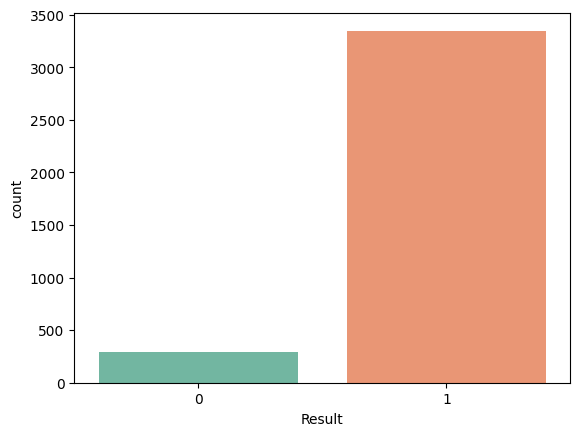

In [ ]:
sns.countplot(data=data, x='Result', palette='Set2')

## **Split the dataset**

In [ ]:
X=data.drop(['Result'],axis=1)
y=data.Result

In [ ]:
X.shape

(3639, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

Age  sex  sick  pregnant  thyroidsurgery  goitre  tumor   T3     T4  \
2890   78    0     0         0               0       0      0  2.0  123.0   
3095   66    0     0         0               0       0      0  1.8  108.0   
2369   78    0     0         0               0       0      0  1.3  101.0   
1022   48    1     0         0               0       0      0  3.5  166.0   
970    52    0     0         0               0       0      0  2.3  125.0   

       T4U    FTI  
2890  0.91  135.0  
3095  0.71  151.0  
2369  0.00    0.0  
1022  1.35  123.0  
970   1.06  117.0

In [ ]:
y_train.head()

2890    1
3095    1
2369    1
1022    1
970     1
Name: Result, dtype: int64

In [ ]:
X_test.shape

(728, 11)

In [ ]:
y_test.shape

(728,)

## **Cross validation**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)

(2911, 11)
(728, 11)


### **DT**

In [ ]:
# # setup parameter space
# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the grid search object
# g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# # conduct grid search over the parameter space
# start_time = time.time()
# g1.fit(X,y)
# duration = time.time() - start_time

# # show best parameter configuration found for classifier
# cls_params1 = g1.best_params_
# cls_params1

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion= 'gini',
                               max_depth= 1,
                               max_leaf_nodes=3,
                               min_samples_split=2)
# model=g1.best_estimator_

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion= 'entropy',
                               max_depth= 1,
                               max_leaf_nodes=3,
                               min_samples_split=2)

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)

Fold 1 Accuracy: 92.03%
Fold 2 Accuracy: 92.03%
Fold 3 Accuracy: 92.03%
Fold 4 Accuracy: 91.90%
Fold 5 Accuracy: 92.02%

Average Accuracy: 92.00%

Fold 1:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

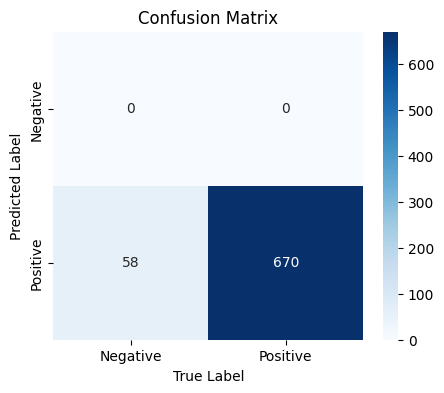


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 2:


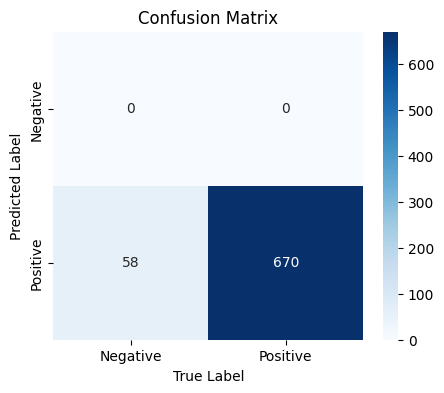


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 3:


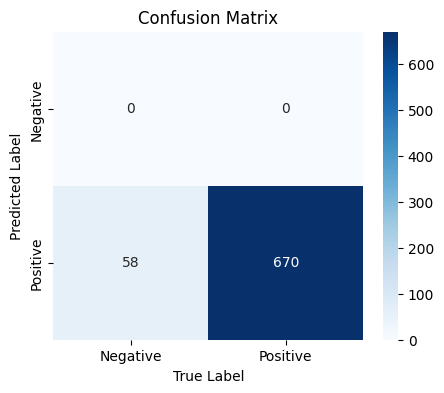


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 4:


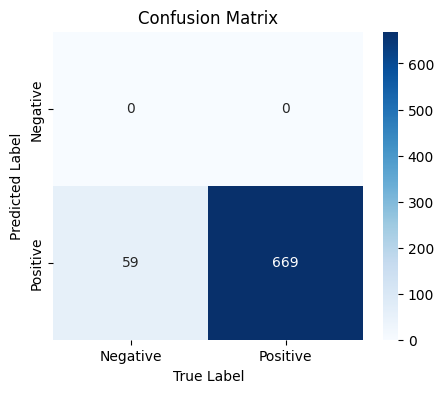


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.92      1.00      0.96       669

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.84      0.92      0.88       728


Fold 5:


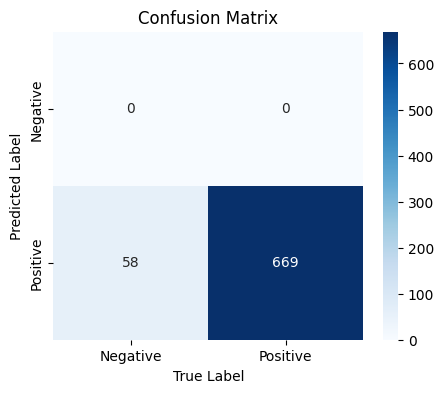


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       669

    accuracy                           0.92       727
   macro avg       0.46      0.50      0.48       727
weighted avg       0.85      0.92      0.88       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg1=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg1:.2%}')

for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **SVM**

In [ ]:
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='sigmoid', C=100, gamma='scale')

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)

Fold 1 Accuracy: 82.83%
Fold 2 Accuracy: 85.16%
Fold 3 Accuracy: 83.79%
Fold 4 Accuracy: 83.79%
Fold 5 Accuracy: 86.11%

Average Accuracy: 84.34%

Fold 1:


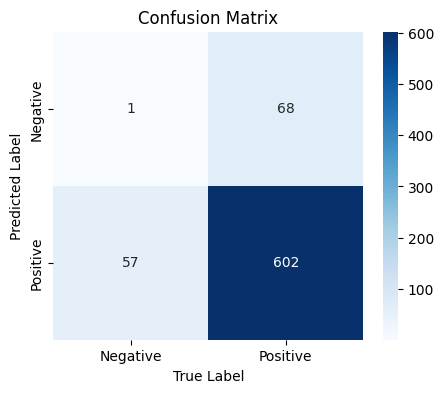


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.02      0.02        58
           1       0.91      0.90      0.91       670

    accuracy                           0.83       728
   macro avg       0.46      0.46      0.46       728
weighted avg       0.84      0.83      0.84       728


Fold 2:


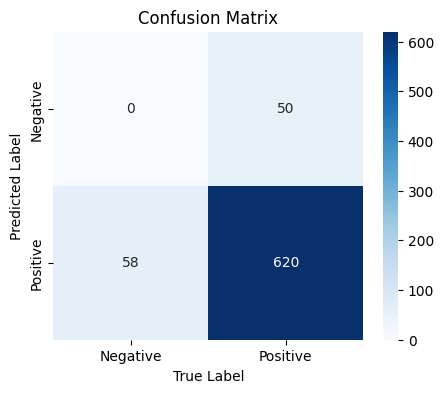


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.91      0.93      0.92       670

    accuracy                           0.85       728
   macro avg       0.46      0.46      0.46       728
weighted avg       0.84      0.85      0.85       728


Fold 3:


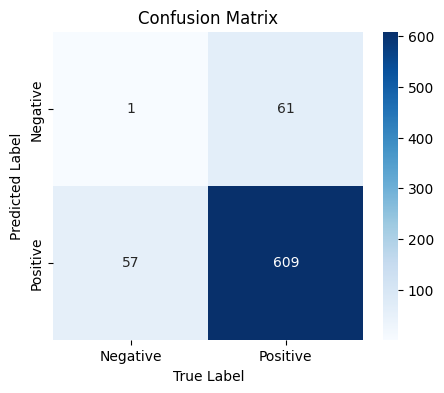


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.02      0.02        58
           1       0.91      0.91      0.91       670

    accuracy                           0.84       728
   macro avg       0.47      0.46      0.46       728
weighted avg       0.84      0.84      0.84       728


Fold 4:


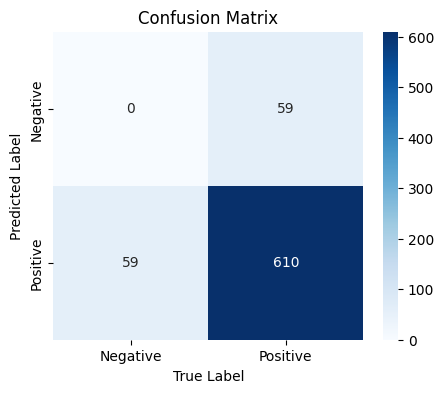


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.91      0.91      0.91       669

    accuracy                           0.84       728
   macro avg       0.46      0.46      0.46       728
weighted avg       0.84      0.84      0.84       728


Fold 5:


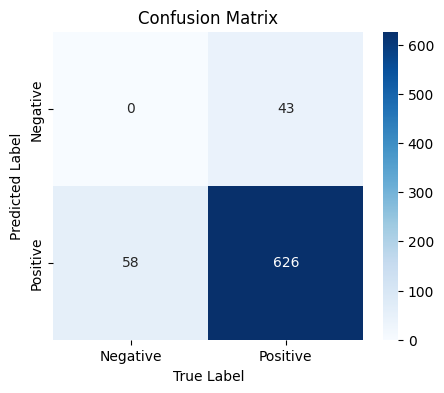


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      0.94      0.93       669

    accuracy                           0.86       727
   macro avg       0.46      0.47      0.46       727
weighted avg       0.84      0.86      0.85       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')

for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **KNN**

In [ ]:
# Initialize the KNN model
model = KNeighborsClassifier(metric='minkowski',p=2)

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 92.03%
Fold 2 Accuracy: 92.86%
Fold 3 Accuracy: 93.27%
Fold 4 Accuracy: 92.86%
Fold 5 Accuracy: 93.67%

Average Accuracy: 92.94%

Fold 1:


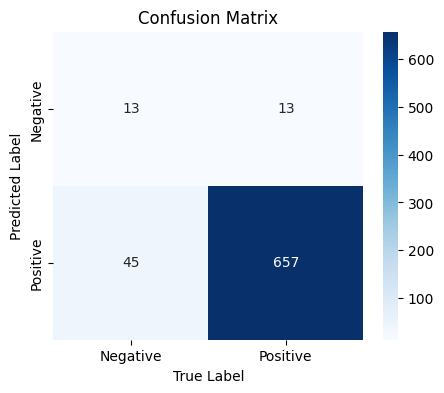


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.22      0.31        58
           1       0.94      0.98      0.96       670

    accuracy                           0.92       728
   macro avg       0.72      0.60      0.63       728
weighted avg       0.90      0.92      0.91       728


Fold 2:


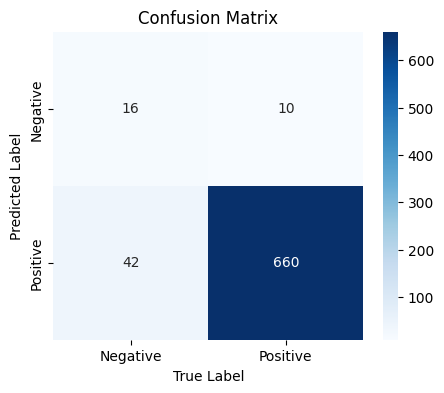


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.28      0.38        58
           1       0.94      0.99      0.96       670

    accuracy                           0.93       728
   macro avg       0.78      0.63      0.67       728
weighted avg       0.91      0.93      0.92       728


Fold 3:


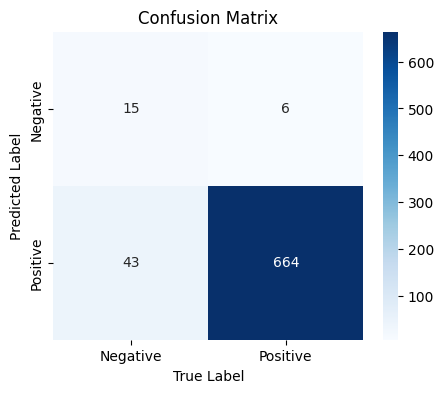


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.26      0.38        58
           1       0.94      0.99      0.96       670

    accuracy                           0.93       728
   macro avg       0.83      0.62      0.67       728
weighted avg       0.92      0.93      0.92       728


Fold 4:


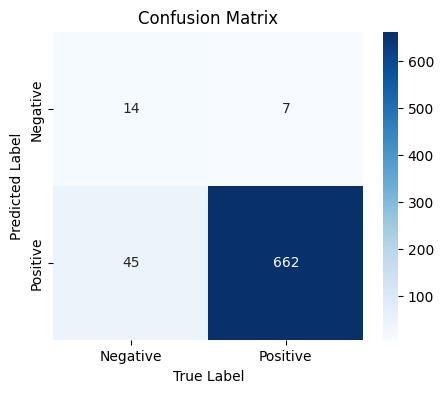


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.24      0.35        59
           1       0.94      0.99      0.96       669

    accuracy                           0.93       728
   macro avg       0.80      0.61      0.66       728
weighted avg       0.91      0.93      0.91       728


Fold 5:


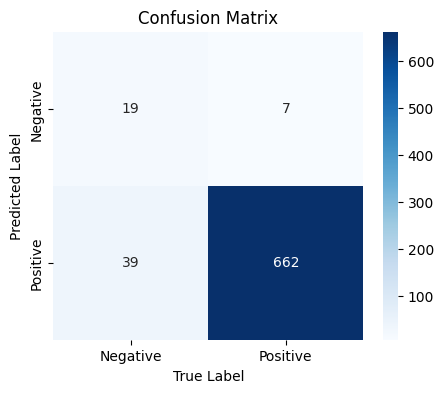


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.33      0.45        58
           1       0.94      0.99      0.97       669

    accuracy                           0.94       727
   macro avg       0.84      0.66      0.71       727
weighted avg       0.93      0.94      0.93       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg3=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg3:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **NB**

In [ ]:
# Initialize the NB model
# model = GaussianNB()
model = BernoulliNB()
# modelb = MultinomialNB()

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 92.03%
Fold 2 Accuracy: 92.03%
Fold 3 Accuracy: 92.03%
Fold 4 Accuracy: 91.90%
Fold 5 Accuracy: 92.02%

Average Accuracy: 92.00%

Fold 1:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

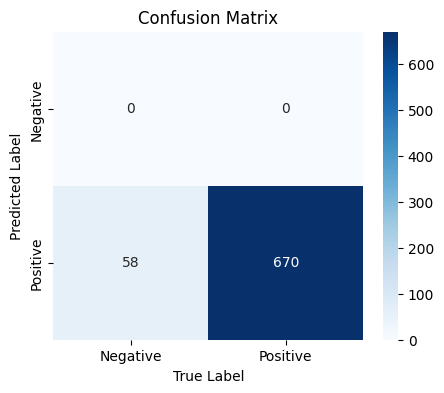


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 2:


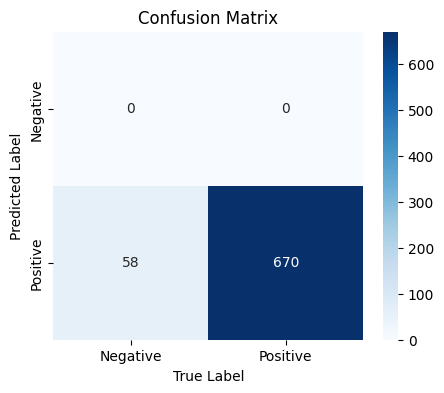


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 3:


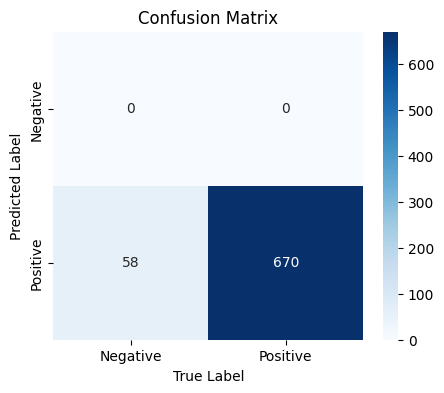


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 4:


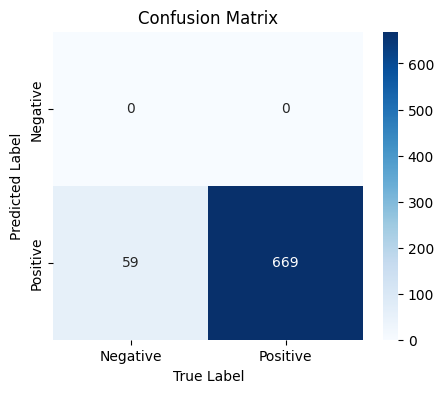


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.92      1.00      0.96       669

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.84      0.92      0.88       728


Fold 5:


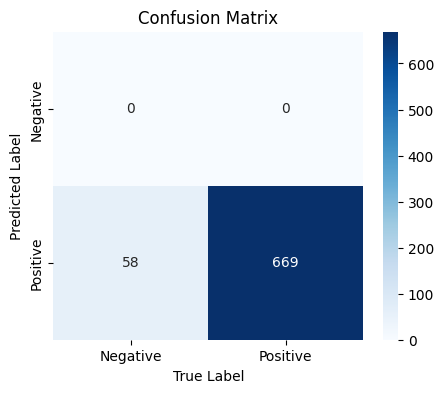


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       669

    accuracy                           0.92       727
   macro avg       0.46      0.50      0.48       727
weighted avg       0.85      0.92      0.88       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg4=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg4:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **ANN**

In [ ]:
# Define the neural network architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=11,activation='relu',input_shape=(11,)))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
# Initialize the ANN model
model = tf.keras.models.Sequential()

# Adding layers to ANN model
model.add(tf.keras.layers.Dense(units=11,activation='relu',input_shape=(11,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)

23/23 [==============================] - 0s 2ms/step
Fold 1 Accuracy: 92.03%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


23/23 [==============================] - 0s 1ms/step
Fold 2 Accuracy: 92.03%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


23/23 [==============================] - 0s 1ms/step
Fold 3 Accuracy: 92.03%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


23/23 [==============================] - 0s 1ms/step
Fold 4 Accuracy: 91.90%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


23/23 [==============================] - 0s 2ms/step
Fold 5 Accuracy: 92.98%

Average Accuracy: 92.20%

Fold 1 :


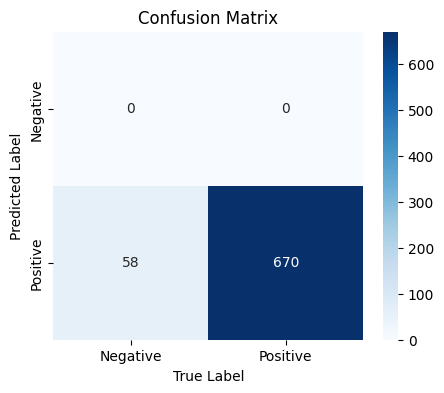


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 2 :


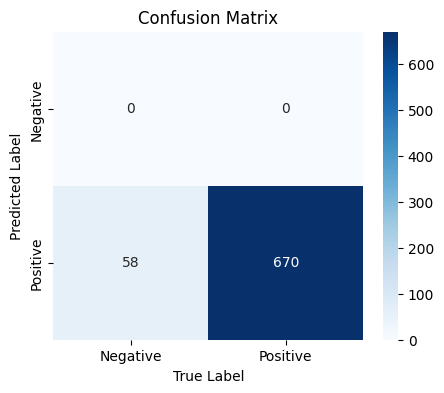


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 3 :


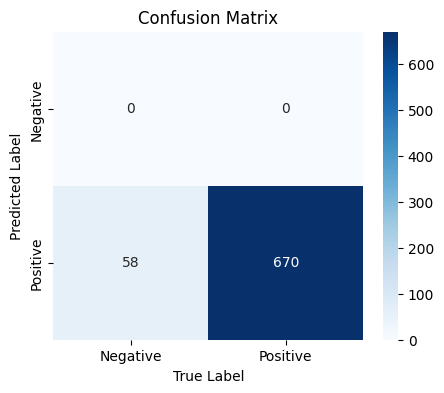


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.92      1.00      0.96       670

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.85      0.92      0.88       728


Fold 4 :


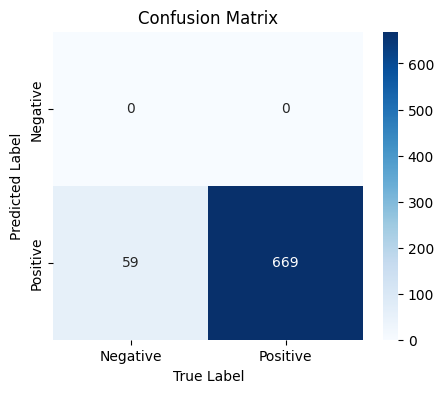


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.92      1.00      0.96       669

    accuracy                           0.92       728
   macro avg       0.46      0.50      0.48       728
weighted avg       0.84      0.92      0.88       728


Fold 5 :


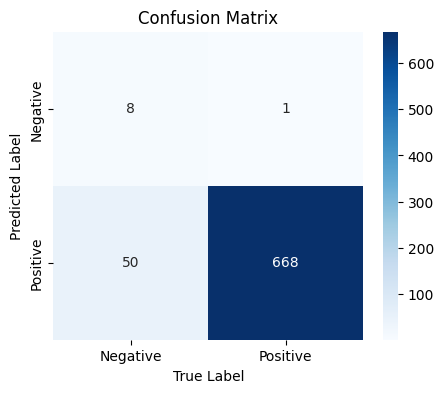


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.14      0.24        58
           1       0.93      1.00      0.96       669

    accuracy                           0.93       727
   macro avg       0.91      0.57      0.60       727
weighted avg       0.93      0.93      0.91       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test)>0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg5=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg5:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i} :')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

## **Comparison**

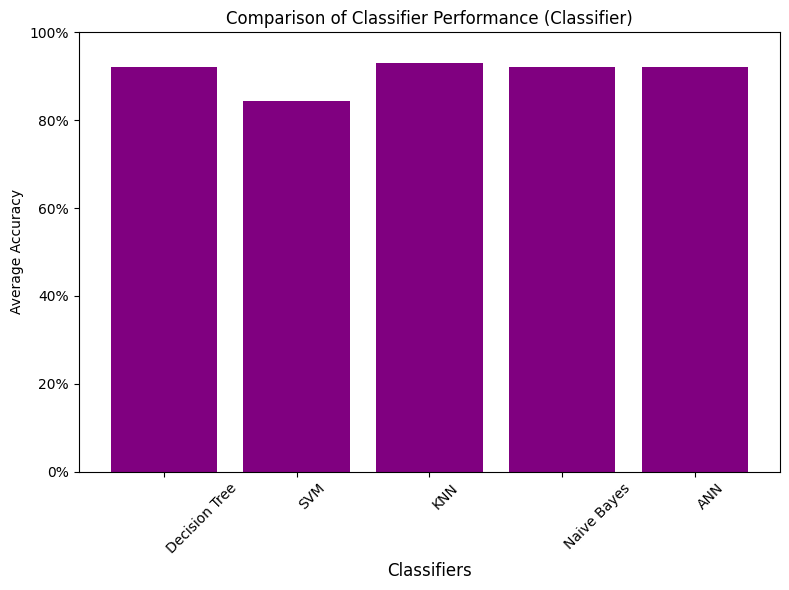

In [ ]:
from matplotlib.ticker import FuncFormatter
# List of classifier names
classifiers = ['Decision Tree', 'SVM', 'KNN', 'Naive Bayes', 'ANN']

# List of average accuracies
average_accuracies = [Avg1 * 100, Avg2 * 100, Avg3 * 100, Avg4 * 100, Avg5 * 100]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, average_accuracies, color='purple')
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=10)
plt.title('Comparison of Classifier Performance (Classifier)')
plt.xticks(rotation=45, ha='left')
def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.ylim(0, 100)  # Set y-axis limit to ensure consistency
plt.tight_layout()
plt.show()


# **K-means Dataset**



## **Data collection**

###**Importing Libraries**###

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import statistics as state
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import pickle
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.model_selection import StratifiedKFold

###**Importing Dataset**###

In [ ]:
data = pd.read_csv('/content/Kmeans.csv')
data.head()

Age  sex  sick  pregnant  thyroidsurgery  goitre  tumor   TSH   T3     T4  \
0   12    0     0         0               0       0      0  1.30  2.5  125.0   
1   20    1     0         0               0       0      0  4.10  2.0  102.0   
2   46    1     0         0               0       0      0  0.98  0.0  109.0   
3   70    0     0         0               0       0      0  0.16  1.9  175.0   
4   70    0     0         0               0       0      0  0.72  1.2   61.0   

    T4U    FTI  Cluster  
0  1.14  109.0        1  
1  0.00    0.0        0  
2  0.91  120.0        0  
3  0.00    0.0        1  
4  0.87   70.0        1

### **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3639 non-null   int64  
 1   sex             3639 non-null   int64  
 2   sick            3639 non-null   int64  
 3   pregnant        3639 non-null   int64  
 4   thyroidsurgery  3639 non-null   int64  
 5   goitre          3639 non-null   int64  
 6   tumor           3639 non-null   int64  
 7   TSH             3639 non-null   float64
 8   T3              3639 non-null   float64
 9   T4              3639 non-null   float64
 10  T4U             3639 non-null   float64
 11  FTI             3639 non-null   float64
 12  Cluster         3639 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 369.7 KB


In [ ]:
# shape of the dataset
data.shape

(3639, 13)

In [ ]:
# Viewing the dataset Columns
data.describe()

Age          sex         sick     pregnant  thyroidsurgery  \
count  3639.000000  3639.000000  3639.000000  3639.000000     3639.000000   
mean     52.014564     0.310525     0.039297     0.014564        0.014564   
std      20.135360     0.462772     0.194326     0.119818        0.119818   
min       1.000000     0.000000     0.000000     0.000000        0.000000   
25%      36.000000     0.000000     0.000000     0.000000        0.000000   
50%      55.000000     0.000000     0.000000     0.000000        0.000000   
75%      68.000000     1.000000     0.000000     0.000000        0.000000   
max     455.000000     1.000000     1.000000     1.000000        1.000000   

            goitre        tumor          TSH           T3           T4  \
count  3639.000000  3639.000000  3639.000000  3639.000000  3639.000000   
mean      0.009343     0.026381     4.755473     1.659615   105.297005   
std       0.096221     0.160287    23.746086     1.073687    39.404675   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.260000     1.100000    86.000000   
50%       0.000000     0.000000     1.300000     1.800000   103.000000   
75%       0.000000     0.000000     2.500000     2.300000   124.000000   
max       1.000000     1.000000   530.000000    10.600000   430.000000   

               T4U         FTI      Cluster  
count  3639.000000  3639.00000  3639.000000  
mean      0.924500   102.70698     0.689475  
std       0.317436    42.61944     0.462772  
min       0.000000     0.00000     0.000000  
25%       0.850000    89.00000     0.000000  
50%       0.960000   105.00000     1.000000  
75%       1.070000   123.00000     1.000000  
max       2.320000   395.00000     1.000000

In [ ]:
# Checking for the data types
data.dtypes

Age                 int64
sex                 int64
sick                int64
pregnant            int64
thyroidsurgery      int64
goitre              int64
tumor               int64
TSH               float64
T3                float64
T4                float64
T4U               float64
FTI               float64
Cluster             int64
dtype: object

In [ ]:
data.columns

Index(['Age', 'sex', 'sick', 'pregnant', 'thyroidsurgery', 'goitre', 'tumor',
       'TSH', 'T3', 'T4', 'T4U', 'FTI', 'Cluster'],
      dtype='object')

### **Feature Engineering**

In [ ]:
data['Cluster'].unique()

array([1, 0])

In [ ]:
data['Cluster'].value_counts()

Cluster
1    2509
0    1130
Name: count, dtype: int64

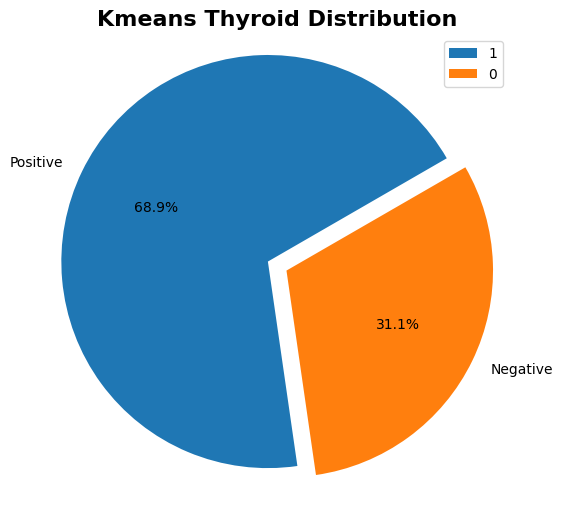

In [ ]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Cluster'].value_counts()[1]
    negative_count = data['Cluster'].value_counts()[0]
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Kmeans Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Cluster'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

## **Data Preprocessing**

### **Check Missing Values**

In [ ]:
data.isnull().sum()

Age               0
sex               0
sick              0
pregnant          0
thyroidsurgery    0
goitre            0
tumor             0
TSH               0
T3                0
T4                0
T4U               0
FTI               0
Cluster           0
dtype: int64

### **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

0

## **Cross Validation**

### **Split Dataset**

In [ ]:
X=data.drop(['Cluster'],axis=1)
y=data.Cluster

In [ ]:
X.shape

(3639, 12)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)

(2911, 12)
(728, 12)


### **DT**

In [ ]:
# # setup parameter space
# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the grid search object
# g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# # conduct grid search over the parameter space
# start_time = time.time()
# g1.fit(X,y)
# duration = time.time() - start_time

# # show best parameter configuration found for classifier
# cls_params1 = g1.best_params_
# cls_params1

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 1,
 max_leaf_nodes=3,
 min_samples_split=2)
# model=g1.best_estimator_

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 100.00%
Fold 2 Accuracy: 100.00%
Fold 3 Accuracy: 100.00%
Fold 4 Accuracy: 100.00%
Fold 5 Accuracy: 100.00%

Average Accuracy: 100.00%

Fold 1:


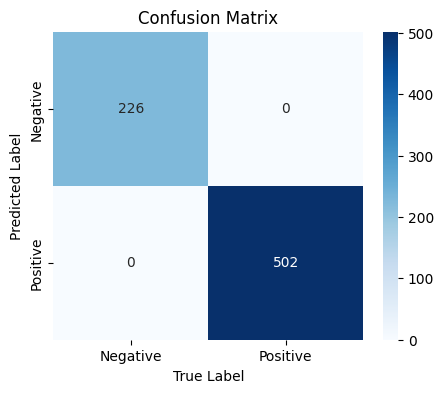


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 2:


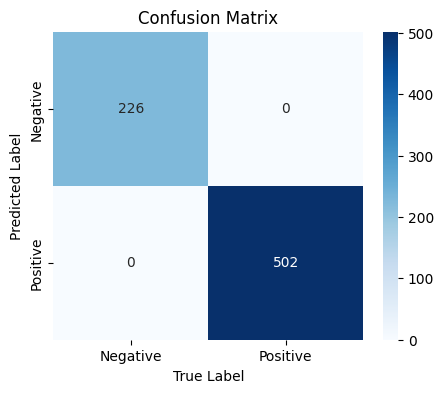


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 3:


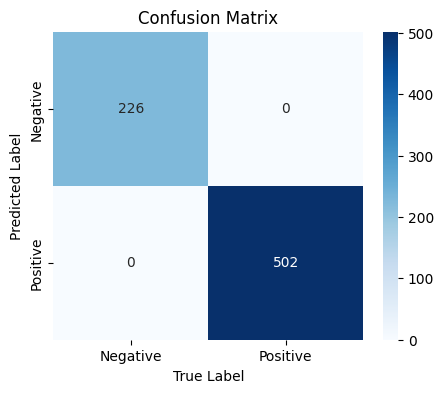


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 4:


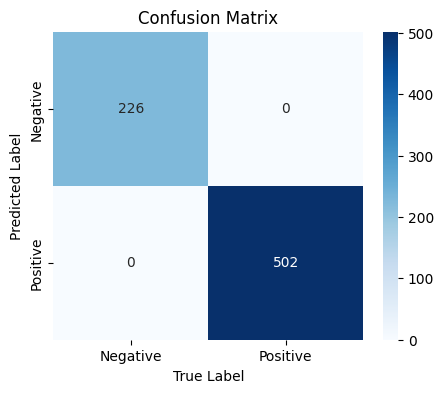


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 5:


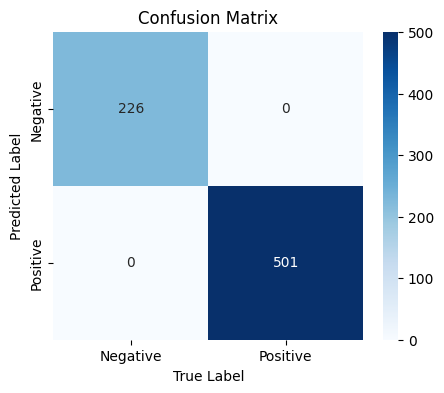


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       501

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg1=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg1:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **SVM**

In [ ]:
# Initialize the SVM model
model = SVC(kernel='sigmoid', C=100, gamma='scale')

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 52.20%
Fold 2 Accuracy: 50.55%
Fold 3 Accuracy: 51.51%
Fold 4 Accuracy: 53.02%
Fold 5 Accuracy: 53.09%

Average Accuracy: 52.08%

Fold 1:


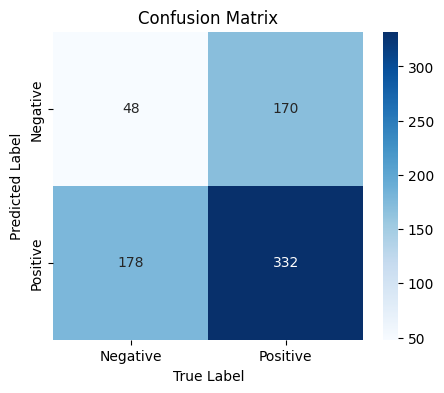


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.21      0.22       226
           1       0.65      0.66      0.66       502

    accuracy                           0.52       728
   macro avg       0.44      0.44      0.44       728
weighted avg       0.52      0.52      0.52       728


Fold 2:


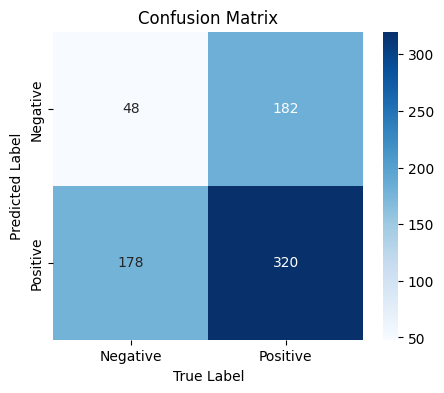


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       226
           1       0.64      0.64      0.64       502

    accuracy                           0.51       728
   macro avg       0.43      0.42      0.43       728
weighted avg       0.51      0.51      0.51       728


Fold 3:


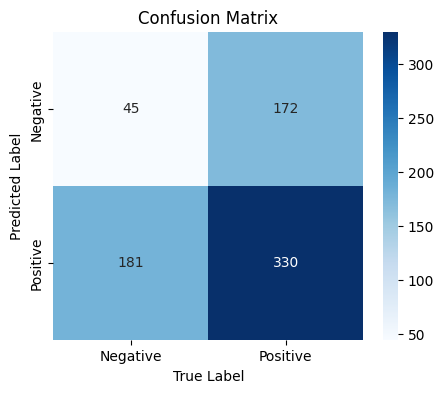


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.20      0.20       226
           1       0.65      0.66      0.65       502

    accuracy                           0.52       728
   macro avg       0.43      0.43      0.43       728
weighted avg       0.51      0.52      0.51       728


Fold 4:


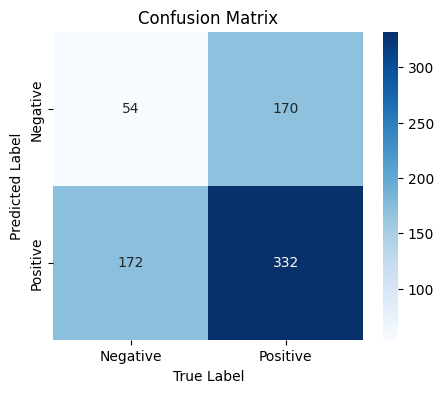


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24       226
           1       0.66      0.66      0.66       502

    accuracy                           0.53       728
   macro avg       0.45      0.45      0.45       728
weighted avg       0.53      0.53      0.53       728


Fold 5:


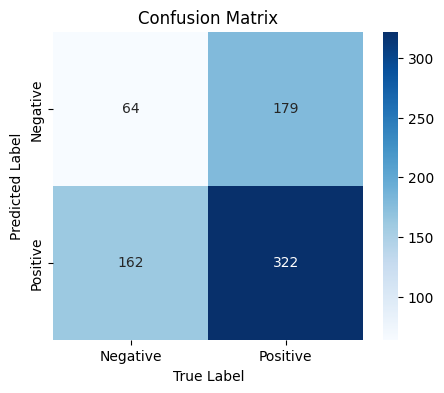


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.28      0.27       226
           1       0.67      0.64      0.65       501

    accuracy                           0.53       727
   macro avg       0.46      0.46      0.46       727
weighted avg       0.54      0.53      0.54       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **KNN**

In [ ]:
# Initialize the KNN model
model = KNeighborsClassifier(metric='minkowski',p=2)

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 69.23%
Fold 2 Accuracy: 66.76%
Fold 3 Accuracy: 64.29%
Fold 4 Accuracy: 63.60%
Fold 5 Accuracy: 66.57%

Average Accuracy: 66.09%

Fold 1:


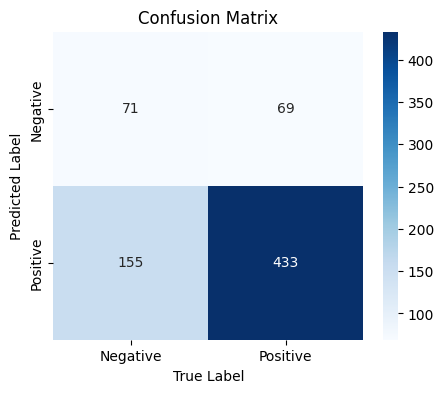


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.31      0.39       226
           1       0.74      0.86      0.79       502

    accuracy                           0.69       728
   macro avg       0.62      0.59      0.59       728
weighted avg       0.67      0.69      0.67       728


Fold 2:


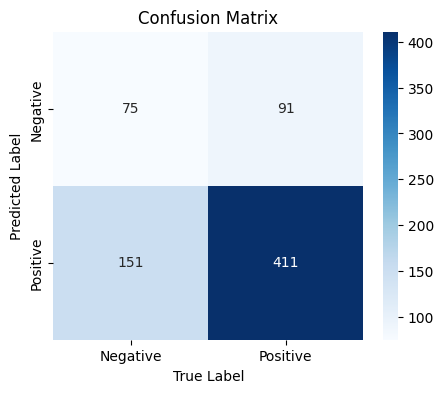


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.33      0.38       226
           1       0.73      0.82      0.77       502

    accuracy                           0.67       728
   macro avg       0.59      0.58      0.58       728
weighted avg       0.64      0.67      0.65       728


Fold 3:


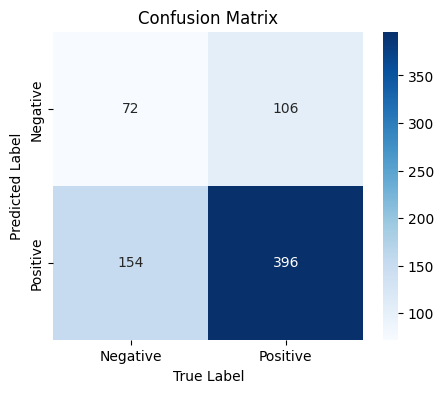


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.32      0.36       226
           1       0.72      0.79      0.75       502

    accuracy                           0.64       728
   macro avg       0.56      0.55      0.55       728
weighted avg       0.62      0.64      0.63       728


Fold 4:


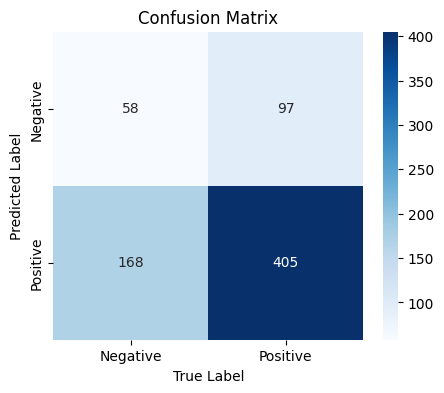


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.26      0.30       226
           1       0.71      0.81      0.75       502

    accuracy                           0.64       728
   macro avg       0.54      0.53      0.53       728
weighted avg       0.60      0.64      0.61       728


Fold 5:


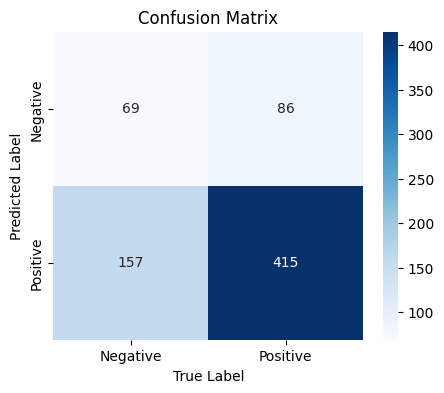


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.31      0.36       226
           1       0.73      0.83      0.77       501

    accuracy                           0.67       727
   macro avg       0.59      0.57      0.57       727
weighted avg       0.64      0.67      0.65       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg3=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg3:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **NB**

In [ ]:
# Initialize the NB model
# classifier_nb = GaussianNB()
model = BernoulliNB()
# classifier_nb = MultinomialNB()

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 100.00%
Fold 2 Accuracy: 100.00%
Fold 3 Accuracy: 100.00%
Fold 4 Accuracy: 100.00%
Fold 5 Accuracy: 100.00%

Average Accuracy: 100.00%

Fold 1:


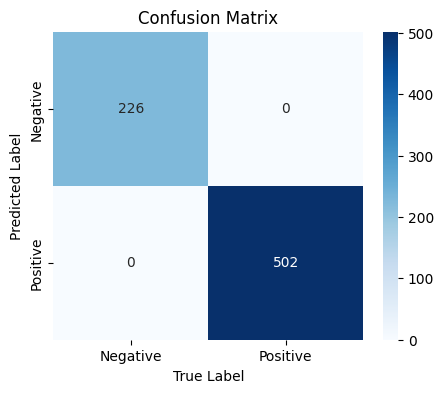


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 2:


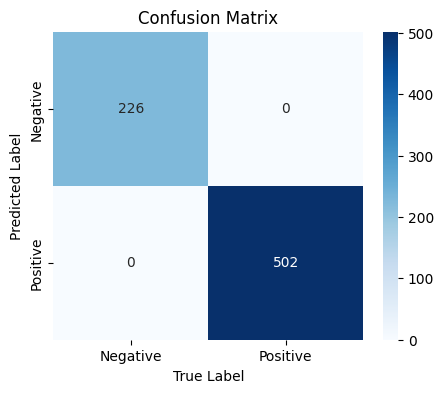


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 3:


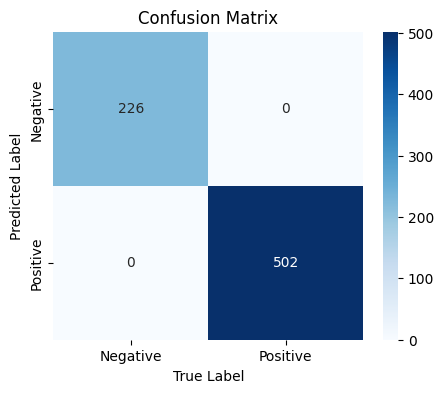


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 4:


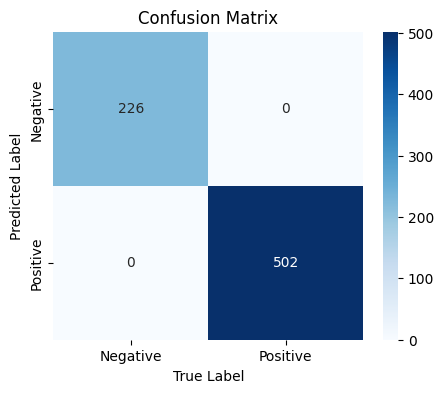


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 5:


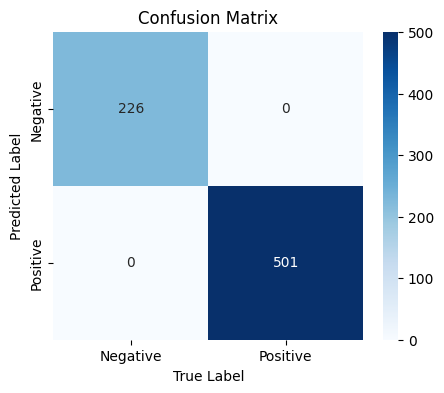


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       501

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg4=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg4:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **ANN**

In [ ]:
# Initialize the ANN model
model = tf.keras.models.Sequential()

# Adding layers to ANN model
model.add(tf.keras.layers.Dense(units=12,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

23/23 [==============================] - 0s 2ms/step
Fold 1 Accuracy: 72.66%
23/23 [==============================] - 0s 2ms/step
Fold 2 Accuracy: 98.08%
23/23 [==============================] - 0s 2ms/step
Fold 3 Accuracy: 99.73%
23/23 [==============================] - 0s 1ms/step
Fold 4 Accuracy: 100.00%
23/23 [==============================] - 0s 2ms/step
Fold 5 Accuracy: 100.00%

Average Accuracy: 94.09%

Fold 1 :


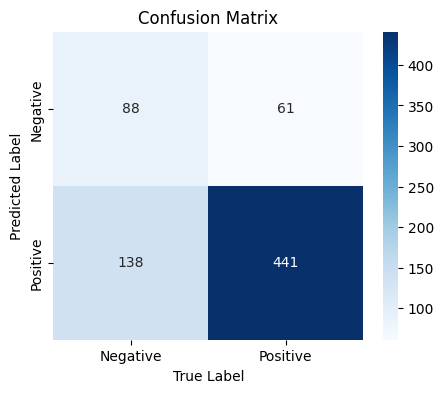


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.39      0.47       226
           1       0.76      0.88      0.82       502

    accuracy                           0.73       728
   macro avg       0.68      0.63      0.64       728
weighted avg       0.71      0.73      0.71       728


Fold 2 :


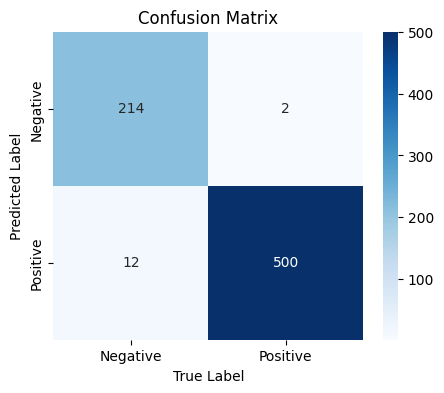


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       226
           1       0.98      1.00      0.99       502

    accuracy                           0.98       728
   macro avg       0.98      0.97      0.98       728
weighted avg       0.98      0.98      0.98       728


Fold 3 :


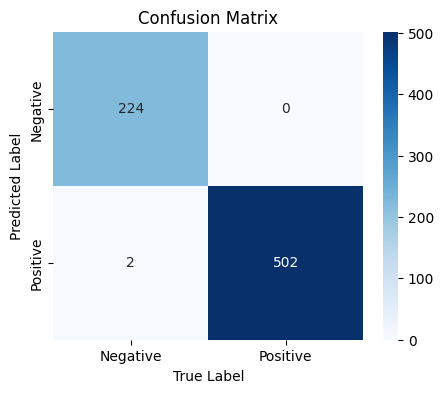


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 4 :


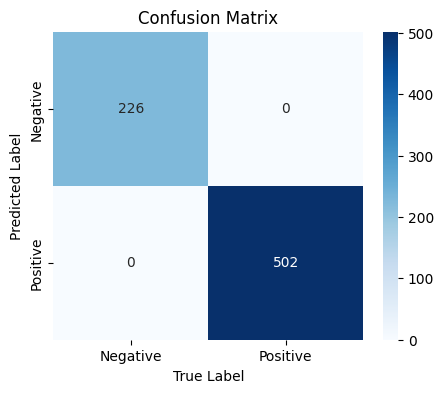


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       502

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 5 :


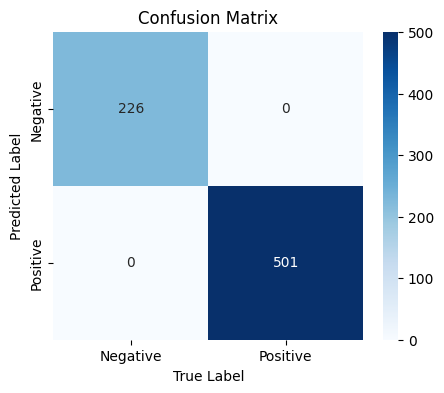


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       501

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test)>0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg5=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg5:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i} :')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

## **Comparison**

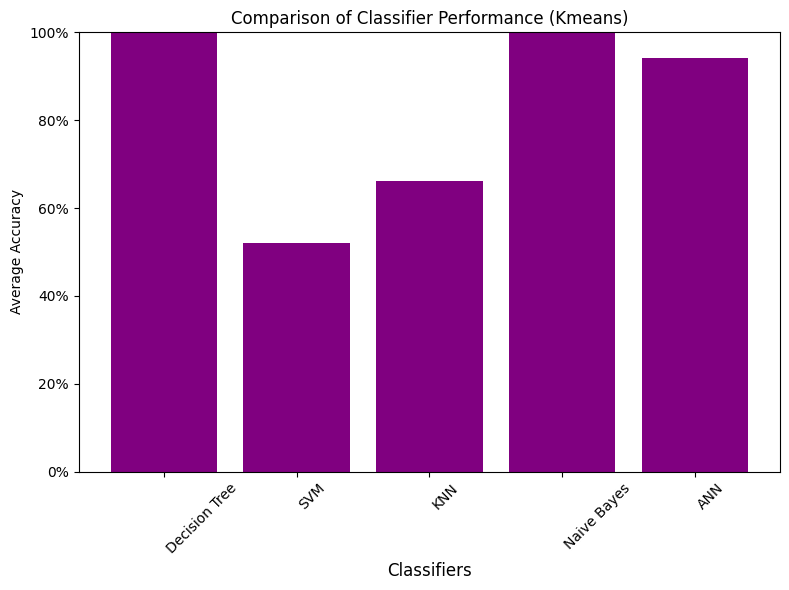

In [ ]:
# List of classifier names
classifiers = ['Decision Tree', 'SVM', 'KNN', 'Naive Bayes', 'ANN']

# List of average accuracies
average_accuracies = [Avg1 * 100, Avg2 * 100, Avg3 * 100, Avg4 * 100, Avg5 * 100]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, average_accuracies, color='purple')
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=10)
plt.title('Comparison of Classifier Performance (Kmeans)')
plt.xticks(rotation=45, ha='left')
def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.ylim(0, 100)  # Set y-axis limit to ensure consistency
plt.tight_layout()
plt.show()


# **K-medoids Dataset**



## **Data collection**

###**Importing Dataset**###

In [ ]:
data = pd.read_csv('/content/Kmedoids.csv')
data.head()

Age  sex  sick  pregnant  thyroidsurgery  goitre  tumor   TSH   T3     T4  \
0   12    0     0         0               0       0      0  1.30  2.5  125.0   
1   20    1     0         0               0       0      0  4.10  2.0  102.0   
2   46    1     0         0               0       0      0  0.98  0.0  109.0   
3   70    0     0         0               0       0      0  0.16  1.9  175.0   
4   70    0     0         0               0       0      0  0.72  1.2   61.0   

    T4U    FTI  Cluster  
0  1.14  109.0        1  
1  0.00    0.0        0  
2  0.91  120.0        0  
3  0.00    0.0        0  
4  0.87   70.0        0

### **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3639 non-null   int64  
 1   sex             3639 non-null   int64  
 2   sick            3639 non-null   int64  
 3   pregnant        3639 non-null   int64  
 4   thyroidsurgery  3639 non-null   int64  
 5   goitre          3639 non-null   int64  
 6   tumor           3639 non-null   int64  
 7   TSH             3639 non-null   float64
 8   T3              3639 non-null   float64
 9   T4              3639 non-null   float64
 10  T4U             3639 non-null   float64
 11  FTI             3639 non-null   float64
 12  Cluster         3639 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 369.7 KB


In [ ]:
# shape of the dataset
data.shape

(3639, 13)

In [ ]:
# Viewing the dataset Columns
data.describe()

Age          sex         sick     pregnant  thyroidsurgery  \
count  3639.000000  3639.000000  3639.000000  3639.000000     3639.000000   
mean     52.014564     0.310525     0.039297     0.014564        0.014564   
std      20.135360     0.462772     0.194326     0.119818        0.119818   
min       1.000000     0.000000     0.000000     0.000000        0.000000   
25%      36.000000     0.000000     0.000000     0.000000        0.000000   
50%      55.000000     0.000000     0.000000     0.000000        0.000000   
75%      68.000000     1.000000     0.000000     0.000000        0.000000   
max     455.000000     1.000000     1.000000     1.000000        1.000000   

            goitre        tumor          TSH           T3           T4  \
count  3639.000000  3639.000000  3639.000000  3639.000000  3639.000000   
mean      0.009343     0.026381     4.755473     1.659615   105.297005   
std       0.096221     0.160287    23.746086     1.073687    39.404675   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.260000     1.100000    86.000000   
50%       0.000000     0.000000     1.300000     1.800000   103.000000   
75%       0.000000     0.000000     2.500000     2.300000   124.000000   
max       1.000000     1.000000   530.000000    10.600000   430.000000   

               T4U         FTI      Cluster  
count  3639.000000  3639.00000  3639.000000  
mean      0.924500   102.70698     0.541358  
std       0.317436    42.61944     0.498355  
min       0.000000     0.00000     0.000000  
25%       0.850000    89.00000     0.000000  
50%       0.960000   105.00000     1.000000  
75%       1.070000   123.00000     1.000000  
max       2.320000   395.00000     1.000000

In [ ]:
# Checking for the data types
data.dtypes

Age                 int64
sex                 int64
sick                int64
pregnant            int64
thyroidsurgery      int64
goitre              int64
tumor               int64
TSH               float64
T3                float64
T4                float64
T4U               float64
FTI               float64
Cluster             int64
dtype: object

In [ ]:
data.columns

Index(['Age', 'sex', 'sick', 'pregnant', 'thyroidsurgery', 'goitre', 'tumor',
       'TSH', 'T3', 'T4', 'T4U', 'FTI', 'Cluster'],
      dtype='object')

### **Feature Engineering**

In [ ]:
data['Cluster'].unique()

array([1, 0])

In [ ]:
data['Cluster'].value_counts()

Cluster
1    1970
0    1669
Name: count, dtype: int64

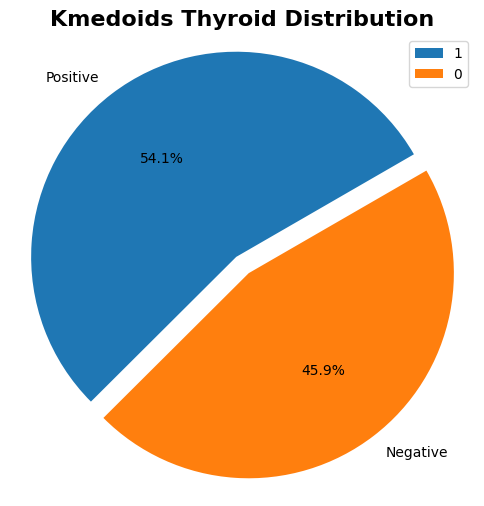

In [ ]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Cluster'].value_counts()[1]
    negative_count = data['Cluster'].value_counts()[0]
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Kmedoids Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Cluster'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

## **Data Preprocessing**

### **Check Missing Values**

In [ ]:
data.isnull().sum()

Age               0
sex               0
sick              0
pregnant          0
thyroidsurgery    0
goitre            0
tumor             0
TSH               0
T3                0
T4                0
T4U               0
FTI               0
Cluster           0
dtype: int64

### **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

0

## **Cross Validation**

### **Split Dataset**

In [ ]:
X=data.drop(['Cluster'],axis=1)
y=data.Cluster

In [ ]:
X.shape

(3639, 12)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)

(2911, 12)
(728, 12)


### **DT**

In [ ]:
# # setup parameter space
# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the grid search object
# g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# # conduct grid search over the parameter space
# start_time = time.time()
# g1.fit(X,y)
# duration = time.time() - start_time

# # show best parameter configuration found for classifier
# cls_params1 = g1.best_params_
# cls_params1

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 1,
 max_leaf_nodes=3,
 min_samples_split=2)
# model=g1.best_estimator_

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 81.59%
Fold 2 Accuracy: 77.34%
Fold 3 Accuracy: 80.22%
Fold 4 Accuracy: 82.28%
Fold 5 Accuracy: 85.42%

Average Accuracy: 81.37%

Fold 1:


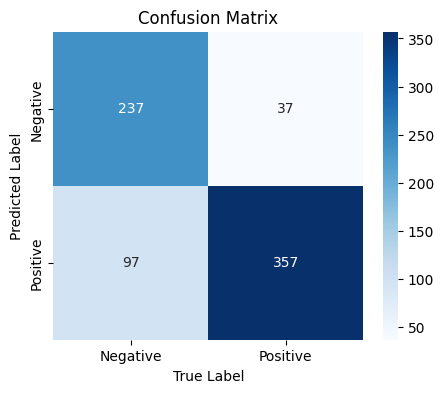


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       334
           1       0.79      0.91      0.84       394

    accuracy                           0.82       728
   macro avg       0.83      0.81      0.81       728
weighted avg       0.82      0.82      0.81       728


Fold 2:


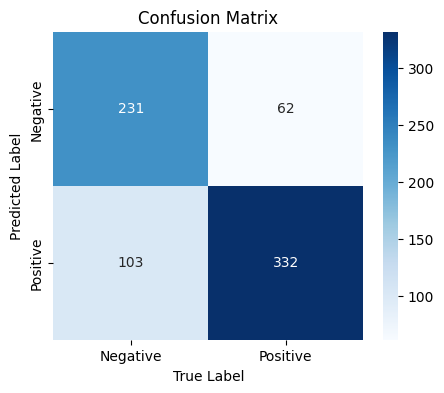


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       334
           1       0.76      0.84      0.80       394

    accuracy                           0.77       728
   macro avg       0.78      0.77      0.77       728
weighted avg       0.77      0.77      0.77       728


Fold 3:


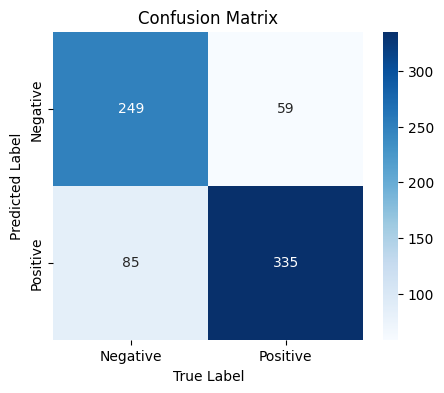


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       334
           1       0.80      0.85      0.82       394

    accuracy                           0.80       728
   macro avg       0.80      0.80      0.80       728
weighted avg       0.80      0.80      0.80       728


Fold 4:


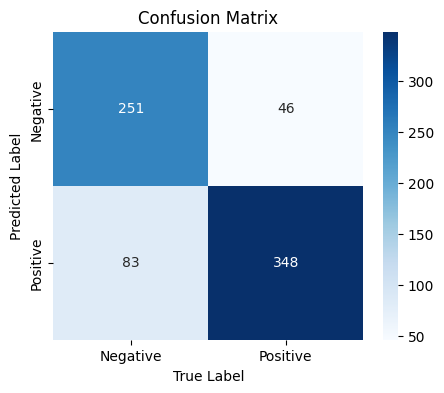


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       334
           1       0.81      0.88      0.84       394

    accuracy                           0.82       728
   macro avg       0.83      0.82      0.82       728
weighted avg       0.82      0.82      0.82       728


Fold 5:


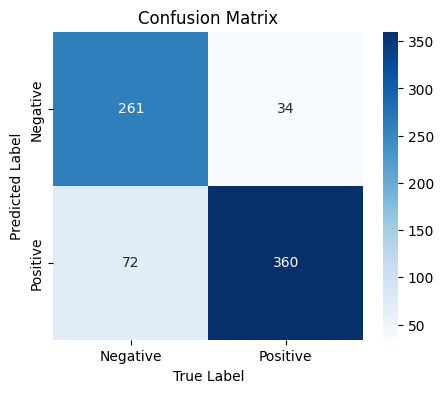


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       333
           1       0.83      0.91      0.87       394

    accuracy                           0.85       727
   macro avg       0.86      0.85      0.85       727
weighted avg       0.86      0.85      0.85       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg1=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg1:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **SVM**

In [ ]:
# Initialize the SVM model
model = SVC(kernel='sigmoid', C=100, gamma='scale')

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 31.87%
Fold 2 Accuracy: 36.54%
Fold 3 Accuracy: 35.03%
Fold 4 Accuracy: 33.65%
Fold 5 Accuracy: 78.27%

Average Accuracy: 43.07%

Fold 1:


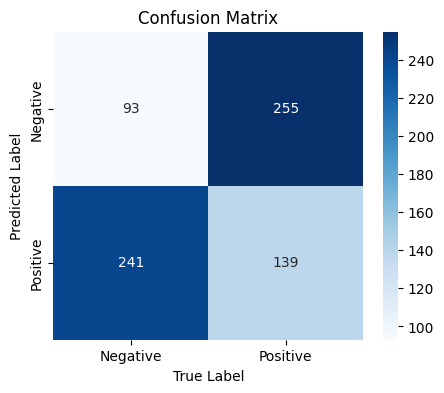


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.28      0.27       334
           1       0.37      0.35      0.36       394

    accuracy                           0.32       728
   macro avg       0.32      0.32      0.32       728
weighted avg       0.32      0.32      0.32       728


Fold 2:


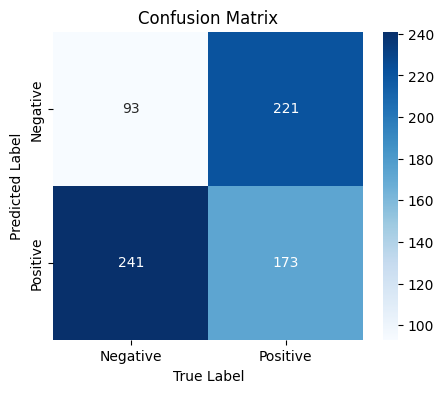


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       334
           1       0.42      0.44      0.43       394

    accuracy                           0.37       728
   macro avg       0.36      0.36      0.36       728
weighted avg       0.36      0.37      0.36       728


Fold 3:


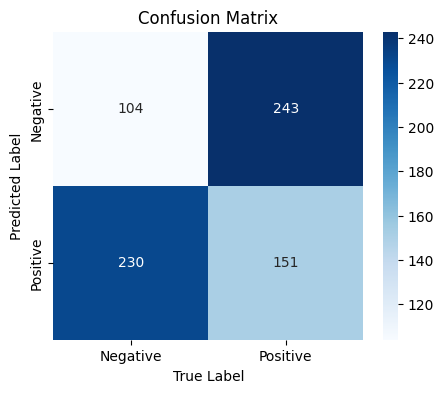


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.31      0.31       334
           1       0.40      0.38      0.39       394

    accuracy                           0.35       728
   macro avg       0.35      0.35      0.35       728
weighted avg       0.35      0.35      0.35       728


Fold 4:


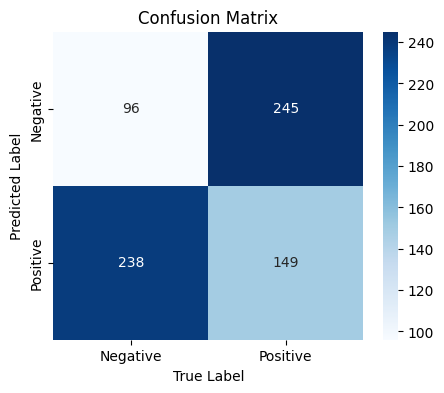


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.29      0.28       334
           1       0.39      0.38      0.38       394

    accuracy                           0.34       728
   macro avg       0.33      0.33      0.33       728
weighted avg       0.34      0.34      0.34       728


Fold 5:


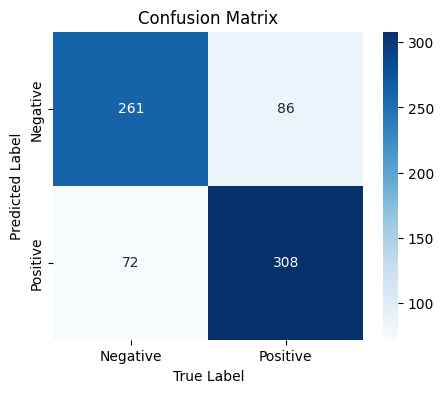


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       333
           1       0.81      0.78      0.80       394

    accuracy                           0.78       727
   macro avg       0.78      0.78      0.78       727
weighted avg       0.78      0.78      0.78       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **KNN**

In [ ]:
# Initialize the KNN model
model = KNeighborsClassifier(metric='minkowski',p=2)

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 84.89%
Fold 2 Accuracy: 83.65%
Fold 3 Accuracy: 85.71%
Fold 4 Accuracy: 86.81%
Fold 5 Accuracy: 87.21%

Average Accuracy: 85.66%

Fold 1:


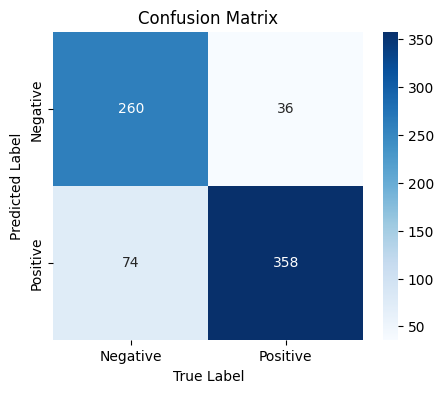


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       334
           1       0.83      0.91      0.87       394

    accuracy                           0.85       728
   macro avg       0.85      0.84      0.85       728
weighted avg       0.85      0.85      0.85       728


Fold 2:


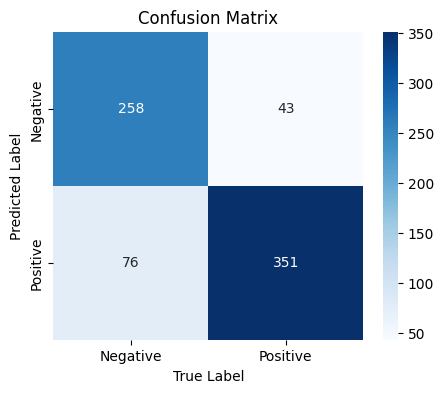


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       334
           1       0.82      0.89      0.86       394

    accuracy                           0.84       728
   macro avg       0.84      0.83      0.83       728
weighted avg       0.84      0.84      0.84       728


Fold 3:


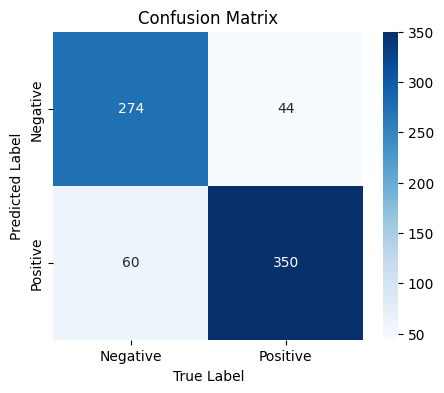


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       334
           1       0.85      0.89      0.87       394

    accuracy                           0.86       728
   macro avg       0.86      0.85      0.86       728
weighted avg       0.86      0.86      0.86       728


Fold 4:


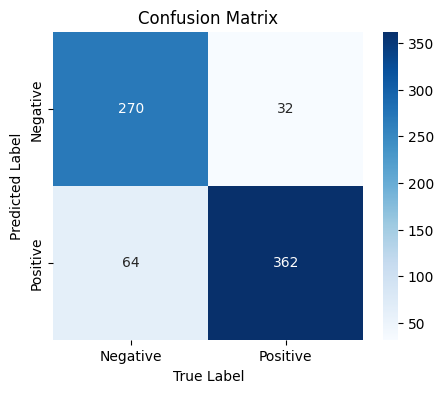


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       334
           1       0.85      0.92      0.88       394

    accuracy                           0.87       728
   macro avg       0.87      0.86      0.87       728
weighted avg       0.87      0.87      0.87       728


Fold 5:


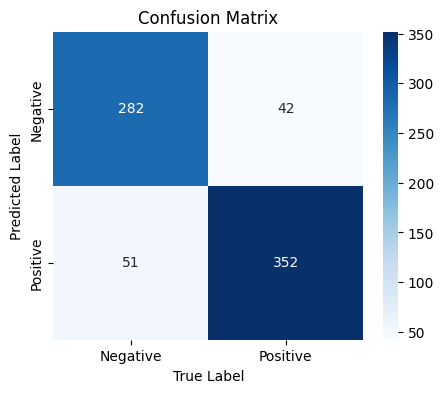


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       333
           1       0.87      0.89      0.88       394

    accuracy                           0.87       727
   macro avg       0.87      0.87      0.87       727
weighted avg       0.87      0.87      0.87       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg3=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg3:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **NB**

In [ ]:
# Initialize the NB model
# model = GaussianNB()
model = BernoulliNB()
# model = MultinomialNB()

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 70.19%
Fold 2 Accuracy: 69.92%
Fold 3 Accuracy: 67.58%
Fold 4 Accuracy: 70.33%
Fold 5 Accuracy: 68.50%

Average Accuracy: 69.30%

Fold 1:


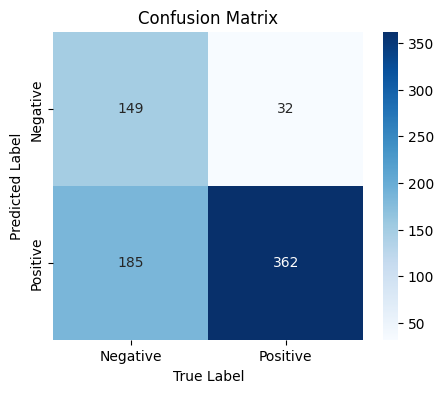


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.45      0.58       334
           1       0.66      0.92      0.77       394

    accuracy                           0.70       728
   macro avg       0.74      0.68      0.67       728
weighted avg       0.74      0.70      0.68       728


Fold 2:


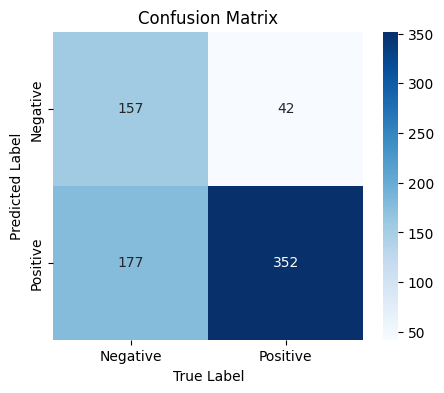


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59       334
           1       0.67      0.89      0.76       394

    accuracy                           0.70       728
   macro avg       0.73      0.68      0.68       728
weighted avg       0.72      0.70      0.68       728


Fold 3:


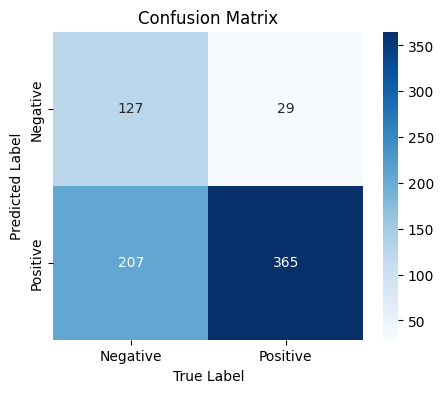


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.38      0.52       334
           1       0.64      0.93      0.76       394

    accuracy                           0.68       728
   macro avg       0.73      0.65      0.64       728
weighted avg       0.72      0.68      0.65       728


Fold 4:


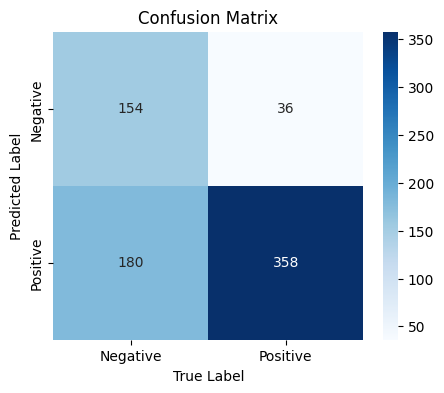


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.46      0.59       334
           1       0.67      0.91      0.77       394

    accuracy                           0.70       728
   macro avg       0.74      0.68      0.68       728
weighted avg       0.73      0.70      0.69       728


Fold 5:


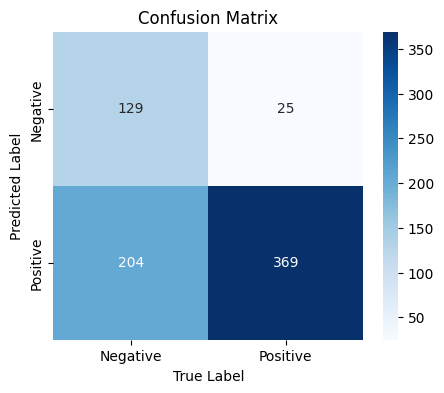


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.39      0.53       333
           1       0.64      0.94      0.76       394

    accuracy                           0.69       727
   macro avg       0.74      0.66      0.65       727
weighted avg       0.73      0.69      0.66       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg4=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg4:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **ANN**

In [ ]:
# Initialize the ANN model
model = tf.keras.models.Sequential()

# Adding layers to ANN model
model.add(tf.keras.layers.Dense(units=12,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

23/23 [==============================] - 0s 3ms/step
Fold 1 Accuracy: 70.05%
23/23 [==============================] - 0s 2ms/step
Fold 2 Accuracy: 76.51%
23/23 [==============================] - 0s 1ms/step
Fold 3 Accuracy: 83.10%
23/23 [==============================] - 0s 2ms/step
Fold 4 Accuracy: 86.26%
23/23 [==============================] - 0s 2ms/step
Fold 5 Accuracy: 88.86%

Average Accuracy: 80.96%

Fold 1 :


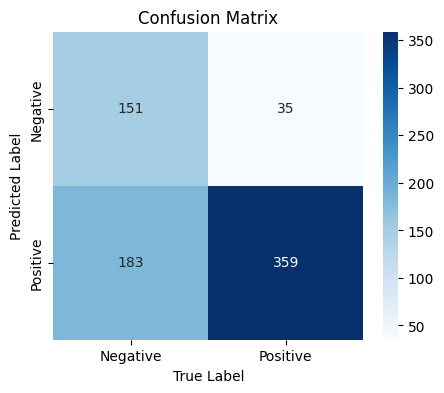


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58       334
           1       0.66      0.91      0.77       394

    accuracy                           0.70       728
   macro avg       0.74      0.68      0.67       728
weighted avg       0.73      0.70      0.68       728


Fold 2 :


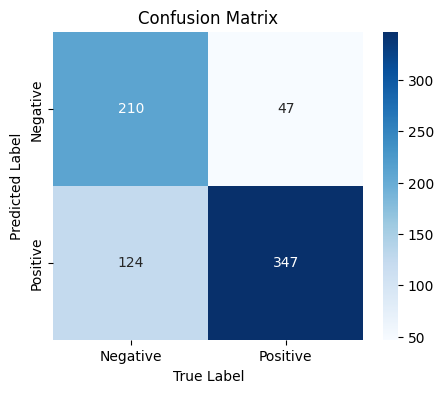


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       334
           1       0.74      0.88      0.80       394

    accuracy                           0.77       728
   macro avg       0.78      0.75      0.76       728
weighted avg       0.77      0.77      0.76       728


Fold 3 :


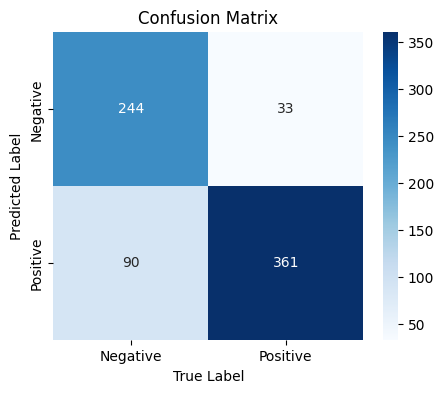


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       334
           1       0.80      0.92      0.85       394

    accuracy                           0.83       728
   macro avg       0.84      0.82      0.83       728
weighted avg       0.84      0.83      0.83       728


Fold 4 :


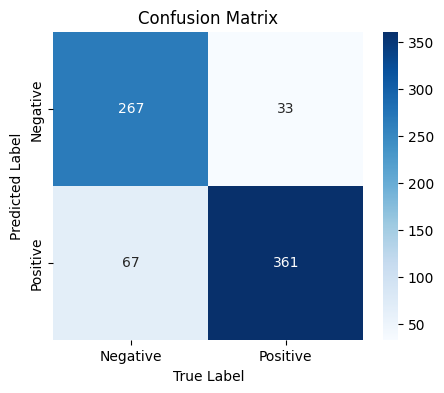


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       334
           1       0.84      0.92      0.88       394

    accuracy                           0.86       728
   macro avg       0.87      0.86      0.86       728
weighted avg       0.86      0.86      0.86       728


Fold 5 :


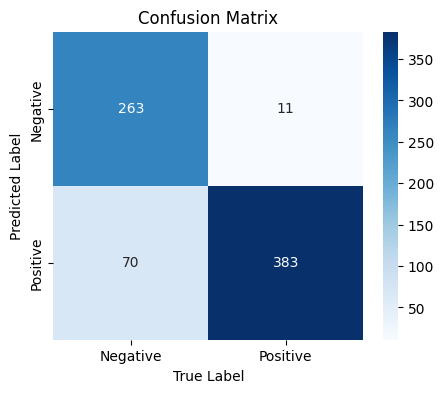


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       333
           1       0.85      0.97      0.90       394

    accuracy                           0.89       727
   macro avg       0.90      0.88      0.89       727
weighted avg       0.90      0.89      0.89       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test)>0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg5=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg5:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i} :')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

## **Comparison**

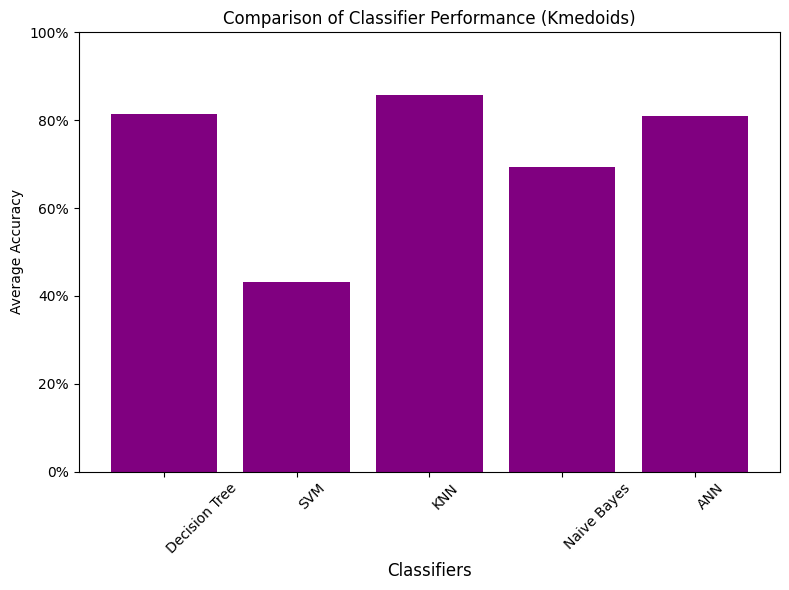

In [ ]:
# List of classifier names
classifiers = ['Decision Tree', 'SVM', 'KNN', 'Naive Bayes', 'ANN']

# List of average accuracies
average_accuracies = [Avg1 * 100, Avg2 * 100, Avg3 * 100, Avg4 * 100, Avg5 * 100]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, average_accuracies, color='purple')
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=10)
plt.title('Comparison of Classifier Performance (Kmedoids)')
plt.xticks(rotation=45, ha='left')
def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.ylim(0, 100)  # Set y-axis limit to ensure consistency
plt.tight_layout()
plt.show()


# **DBSCAN Dataset**



## **Data collection**

###**Importing Dataset**###

In [ ]:
data = pd.read_csv('/content/DBSCAN.csv')
data.head()

Age  sex  sick  pregnant  thyroidsurgery  goitre  tumor   TSH   T3     T4  \
0   12    0     0         0               0       0      0  1.30  2.5  125.0   
1   46    1     0         0               0       0      0  0.98  0.0  109.0   
2   70    0     0         0               0       0      0  0.72  1.2   61.0   
3   18    0     0         0               0       0      0  0.03  0.0  183.0   
4   59    0     0         0               0       0      0  0.00  0.0   72.0   

    T4U    FTI  Cluster  
0  1.14  109.0        1  
1  0.91  120.0        0  
2  0.87   70.0        1  
3  1.30  141.0        1  
4  0.92   78.0        1

### **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2948 non-null   int64  
 1   sex             2948 non-null   int64  
 2   sick            2948 non-null   int64  
 3   pregnant        2948 non-null   int64  
 4   thyroidsurgery  2948 non-null   int64  
 5   goitre          2948 non-null   int64  
 6   tumor           2948 non-null   int64  
 7   TSH             2948 non-null   float64
 8   T3              2948 non-null   float64
 9   T4              2948 non-null   float64
 10  T4U             2948 non-null   float64
 11  FTI             2948 non-null   float64
 12  Cluster         2948 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 299.5 KB


In [ ]:
# shape of the dataset
data.shape

(2948, 13)

In [ ]:
# Viewing the dataset Columns
data.describe()

Age          sex    sick  pregnant  thyroidsurgery  goitre  \
count  2948.000000  2948.000000  2948.0    2948.0          2948.0  2948.0   
mean     52.651628     0.325305     0.0       0.0             0.0     0.0   
std      18.832331     0.468568     0.0       0.0             0.0     0.0   
min       1.000000     0.000000     0.0       0.0             0.0     0.0   
25%      37.000000     0.000000     0.0       0.0             0.0     0.0   
50%      55.000000     0.000000     0.0       0.0             0.0     0.0   
75%      68.000000     1.000000     0.0       0.0             0.0     0.0   
max      94.000000     1.000000     0.0       0.0             0.0     0.0   

        tumor          TSH          T3           T4          T4U          FTI  \
count  2948.0  2948.000000  2948.00000  2948.000000  2948.000000  2948.000000   
mean      0.0     3.015797     1.61945   106.724152     0.978146   110.012551   
std       0.0     7.794083     0.93973    29.331388     0.166355    27.707305   
min       0.0     0.000000     0.00000     0.000000     0.360000     3.000000   
25%       0.0     0.380000     1.10000    88.000000     0.870000    93.000000   
50%       0.0     1.300000     1.80000   103.000000     0.970000   107.000000   
75%       0.0     2.500000     2.20000   123.000000     1.070000   124.000000   
max       0.0   143.000000     5.10000   213.000000     1.730000   224.000000   

           Cluster  
count  2948.000000  
mean      0.674695  
std       0.468568  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [ ]:
# Checking for the data types
data.dtypes

Age                 int64
sex                 int64
sick                int64
pregnant            int64
thyroidsurgery      int64
goitre              int64
tumor               int64
TSH               float64
T3                float64
T4                float64
T4U               float64
FTI               float64
Cluster             int64
dtype: object

In [ ]:
data.columns

Index(['Age', 'sex', 'sick', 'pregnant', 'thyroidsurgery', 'goitre', 'tumor',
       'TSH', 'T3', 'T4', 'T4U', 'FTI', 'Cluster'],
      dtype='object')

### **Feature Engineering**

In [ ]:
data['Cluster'].unique()

array([1, 0])

In [ ]:
data['Cluster'].value_counts()

Cluster
1    1989
0     959
Name: count, dtype: int64

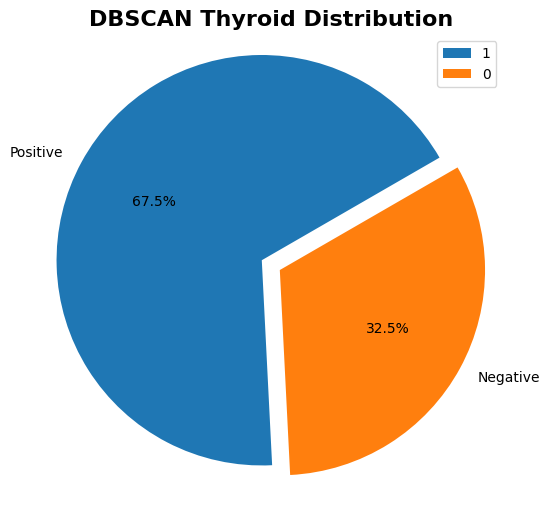

In [ ]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Cluster'].value_counts()[1]
    negative_count = data['Cluster'].value_counts()[0]
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('DBSCAN Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Cluster'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

## **Data Preprocessing**

### **Check Missing Values**

In [ ]:
data.isnull().sum()

Age               0
sex               0
sick              0
pregnant          0
thyroidsurgery    0
goitre            0
tumor             0
TSH               0
T3                0
T4                0
T4U               0
FTI               0
Cluster           0
dtype: int64

### **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

0

## **Cross Validation**

### **Split Dataset**

In [ ]:
X=data.drop(['Cluster'],axis=1)
y=data.Cluster

In [ ]:
X.shape

(2948, 12)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)

(2358, 12)
(590, 12)


### **DT**

In [ ]:
# # setup parameter space
# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the grid search object
# g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# # conduct grid search over the parameter space
# start_time = time.time()
# g1.fit(X,y)
# duration = time.time() - start_time

# # show best parameter configuration found for classifier
# cls_params1 = g1.best_params_
# cls_params1

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 1,
 max_leaf_nodes=3,
 min_samples_split=2)
# model=g1.best_estimator_

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 100.00%
Fold 2 Accuracy: 100.00%
Fold 3 Accuracy: 100.00%
Fold 4 Accuracy: 100.00%
Fold 5 Accuracy: 100.00%

Average Accuracy: 100.00%

Fold 1:


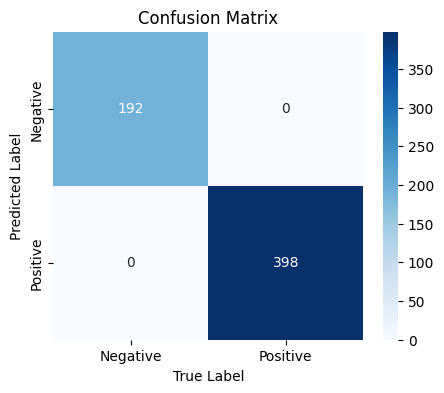


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 2:


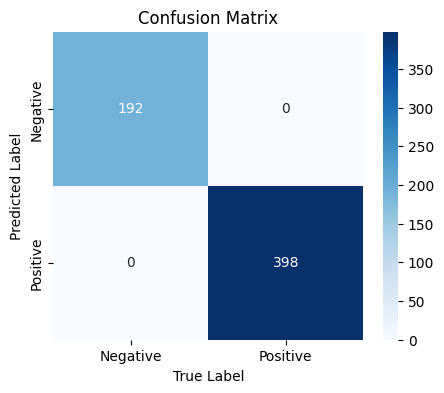


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 3:


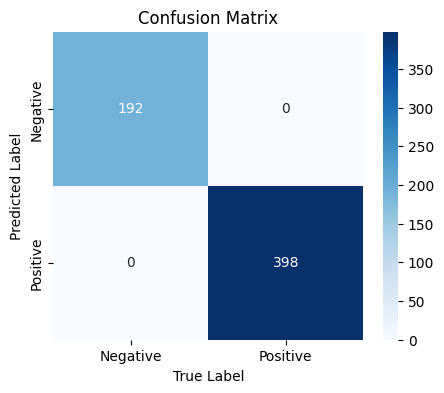


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 4:


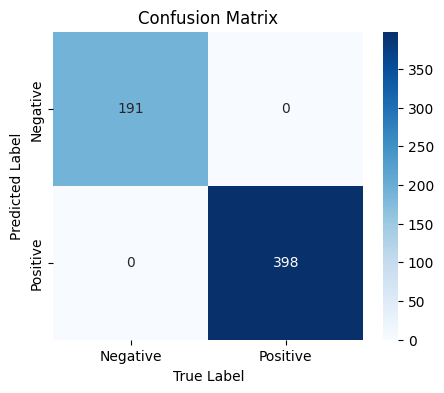


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       398

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589


Fold 5:


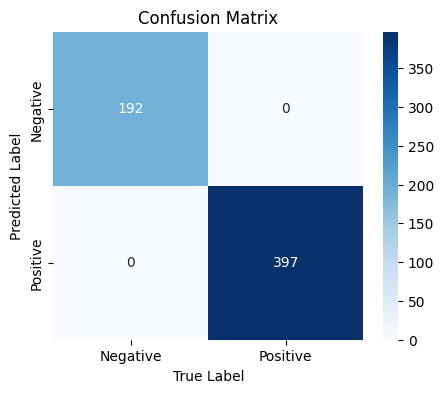


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       397

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg1=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg1:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **SVM**

In [ ]:
# Initialize the SVM model
model = SVC(kernel='poly', degree=3, C=100, gamma='scale')

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 98.47%
Fold 2 Accuracy: 98.98%
Fold 3 Accuracy: 98.64%
Fold 4 Accuracy: 99.15%
Fold 5 Accuracy: 99.15%

Average Accuracy: 98.88%

Fold 1:


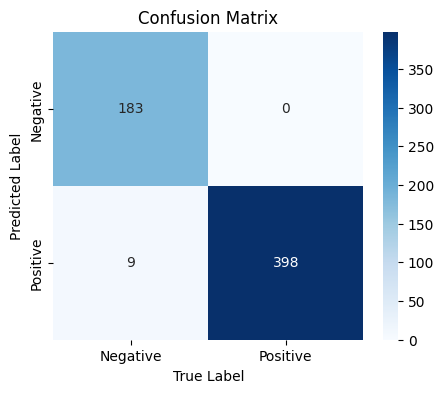


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       192
           1       0.98      1.00      0.99       398

    accuracy                           0.98       590
   macro avg       0.99      0.98      0.98       590
weighted avg       0.99      0.98      0.98       590


Fold 2:


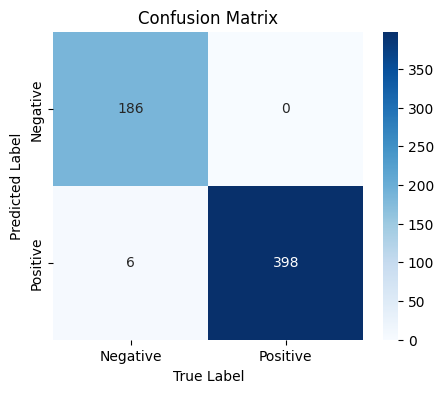


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       192
           1       0.99      1.00      0.99       398

    accuracy                           0.99       590
   macro avg       0.99      0.98      0.99       590
weighted avg       0.99      0.99      0.99       590


Fold 3:


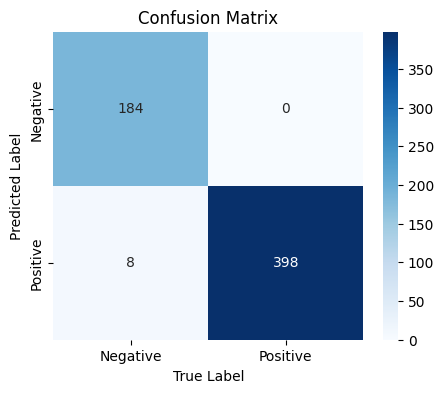


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       192
           1       0.98      1.00      0.99       398

    accuracy                           0.99       590
   macro avg       0.99      0.98      0.98       590
weighted avg       0.99      0.99      0.99       590


Fold 4:


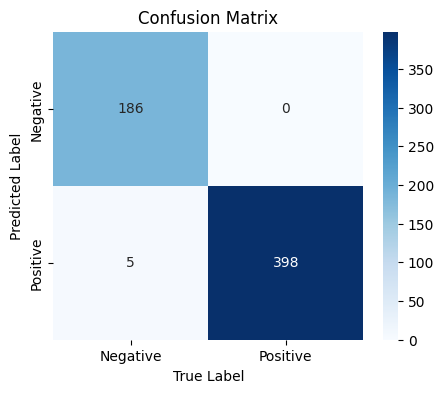


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       191
           1       0.99      1.00      0.99       398

    accuracy                           0.99       589
   macro avg       0.99      0.99      0.99       589
weighted avg       0.99      0.99      0.99       589


Fold 5:


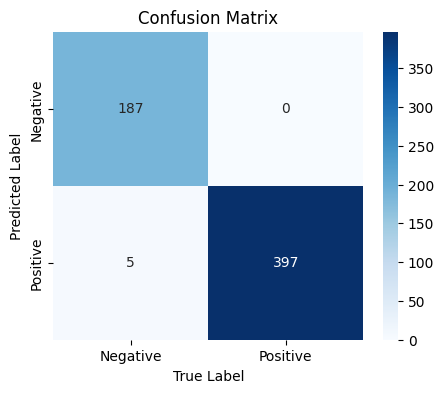


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       192
           1       0.99      1.00      0.99       397

    accuracy                           0.99       589
   macro avg       0.99      0.99      0.99       589
weighted avg       0.99      0.99      0.99       589



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **KNN**

In [ ]:
# Initialize the KNN model
model = KNeighborsClassifier(metric='minkowski',p=2)

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 66.61%
Fold 2 Accuracy: 67.12%
Fold 3 Accuracy: 65.08%
Fold 4 Accuracy: 61.63%
Fold 5 Accuracy: 66.21%

Average Accuracy: 65.33%

Fold 1:


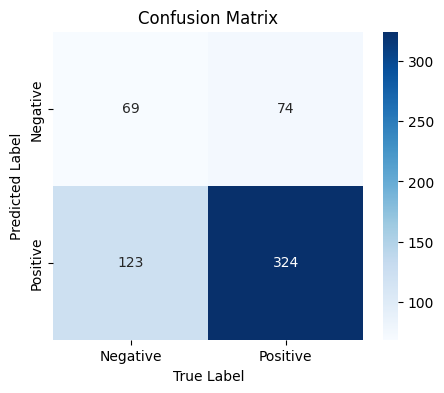


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41       192
           1       0.72      0.81      0.77       398

    accuracy                           0.67       590
   macro avg       0.60      0.59      0.59       590
weighted avg       0.65      0.67      0.65       590


Fold 2:


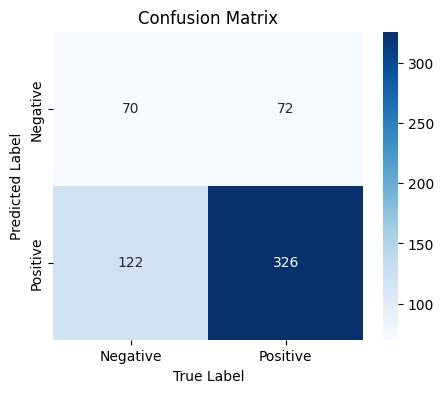


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.36      0.42       192
           1       0.73      0.82      0.77       398

    accuracy                           0.67       590
   macro avg       0.61      0.59      0.59       590
weighted avg       0.65      0.67      0.66       590


Fold 3:


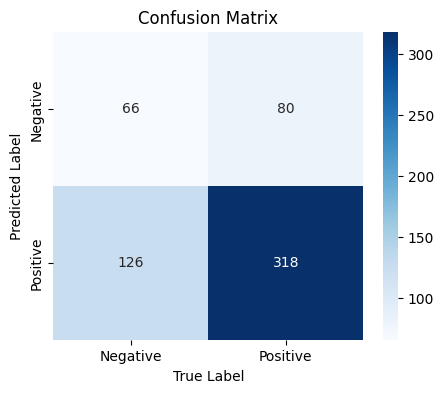


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.34      0.39       192
           1       0.72      0.80      0.76       398

    accuracy                           0.65       590
   macro avg       0.58      0.57      0.57       590
weighted avg       0.63      0.65      0.64       590


Fold 4:


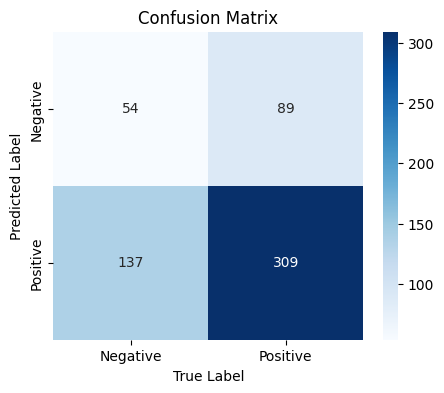


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.28      0.32       191
           1       0.69      0.78      0.73       398

    accuracy                           0.62       589
   macro avg       0.54      0.53      0.53       589
weighted avg       0.59      0.62      0.60       589


Fold 5:


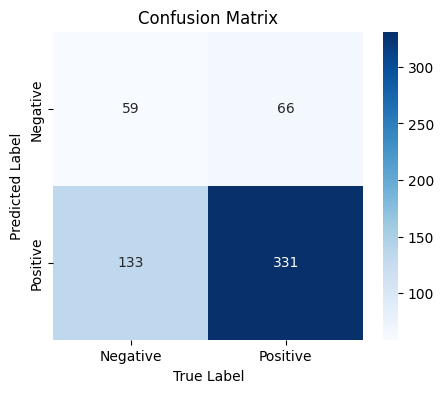


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       192
           1       0.71      0.83      0.77       397

    accuracy                           0.66       589
   macro avg       0.59      0.57      0.57       589
weighted avg       0.63      0.66      0.64       589



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg3=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg3:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **NB**

In [ ]:
# Initialize the NB model
# classifier_nb = GaussianNB()
model = BernoulliNB()
# classifier_nb = MultinomialNB()

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 100.00%
Fold 2 Accuracy: 100.00%
Fold 3 Accuracy: 100.00%
Fold 4 Accuracy: 100.00%
Fold 5 Accuracy: 100.00%

Average Accuracy: 100.00%

Fold 1:


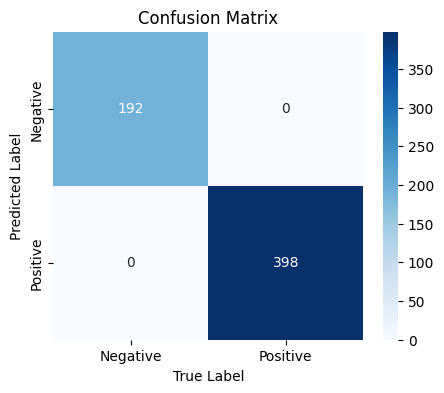


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 2:


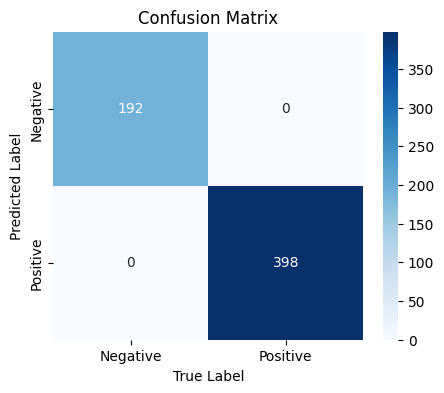


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 3:


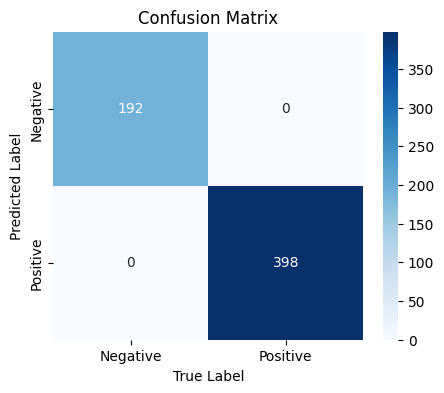


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 4:


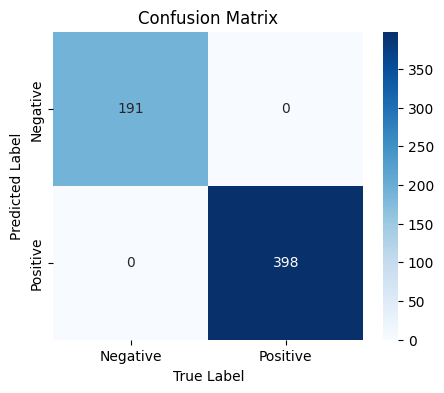


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       398

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589


Fold 5:


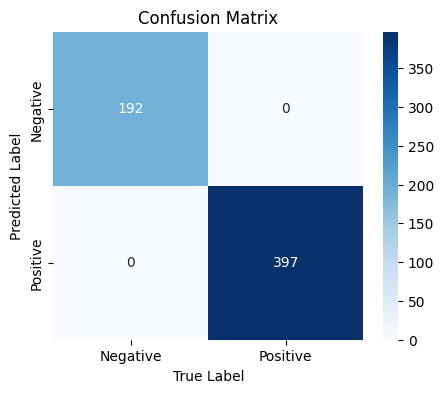


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       397

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg4=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg4:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **ANN**

In [ ]:
# Initialize the ANN model
model = tf.keras.models.Sequential()

# Adding layers to ANN model
model.add(tf.keras.layers.Dense(units=12,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

19/19 [==============================] - 0s 2ms/step
Fold 1 Accuracy: 77.63%
19/19 [==============================] - 0s 3ms/step
Fold 2 Accuracy: 99.83%
19/19 [==============================] - 0s 1ms/step
Fold 3 Accuracy: 100.00%
19/19 [==============================] - 0s 1ms/step
Fold 4 Accuracy: 100.00%
19/19 [==============================] - 0s 2ms/step
Fold 5 Accuracy: 100.00%

Average Accuracy: 95.49%

Fold 1 :


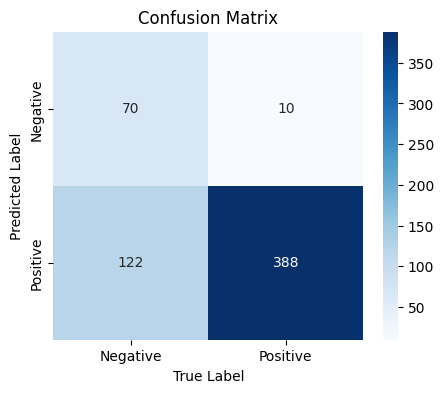


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.36      0.51       192
           1       0.76      0.97      0.85       398

    accuracy                           0.78       590
   macro avg       0.82      0.67      0.68       590
weighted avg       0.80      0.78      0.74       590


Fold 2 :


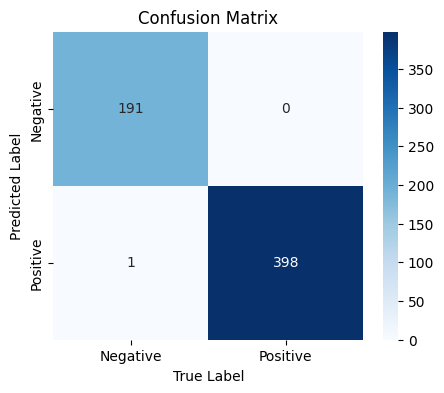


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 3 :


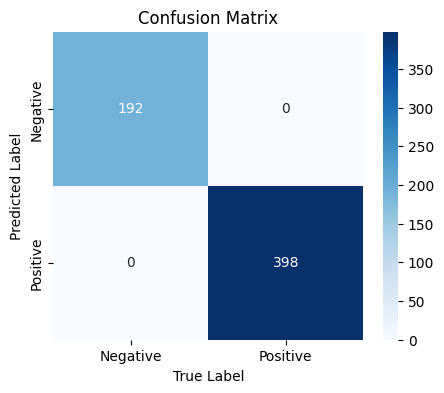


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       398

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590


Fold 4 :


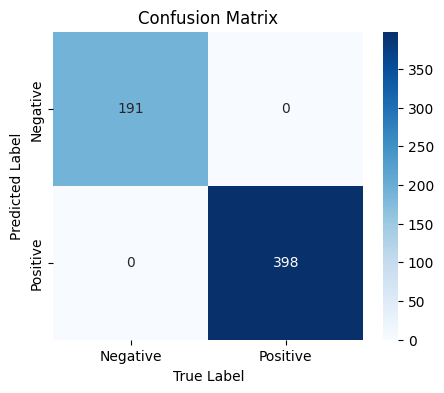


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       398

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589


Fold 5 :


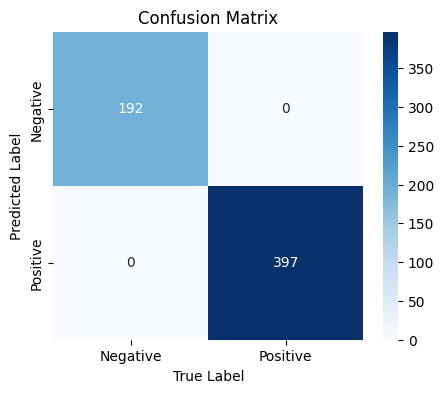


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       397

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test)>0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg5=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg5:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i} :')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

## **Comparison**

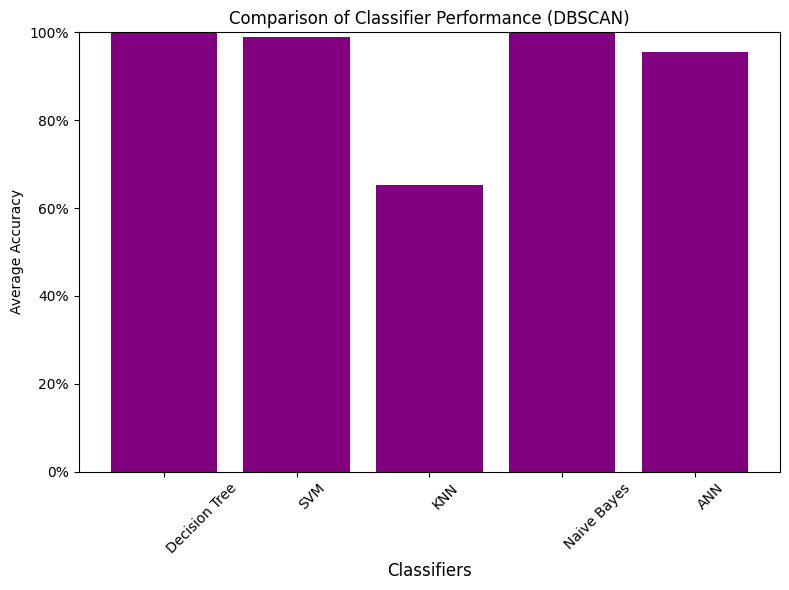

In [ ]:
# List of classifier names
classifiers = ['Decision Tree', 'SVM', 'KNN', 'Naive Bayes', 'ANN']

# List of average accuracies
average_accuracies = [Avg1 * 100, Avg2 * 100, Avg3 * 100, Avg4 * 100, Avg5 * 100]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, average_accuracies, color='purple')
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=10)
plt.title('Comparison of Classifier Performance (DBSCAN)')
plt.xticks(rotation=45, ha='left')
def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.ylim(0, 100)  # Set y-axis limit to ensure consistency
plt.tight_layout()
plt.show()


# **Hierarchical Dataset**



## **Data collection**

###**Importing Dataset**###

In [ ]:
data = pd.read_csv('/content/Hierarchical.csv')
data.head()

Age  sex  sick  pregnant  thyroidsurgery  goitre  tumor   TSH   T3     T4  \
0   12    0     0         0               0       0      0  1.30  2.5  125.0   
1   20    1     0         0               0       0      0  4.10  2.0  102.0   
2   46    1     0         0               0       0      0  0.98  0.0  109.0   
3   70    0     0         0               0       0      0  0.16  1.9  175.0   
4   70    0     0         0               0       0      0  0.72  1.2   61.0   

    T4U    FTI  Cluster  
0  1.14  109.0        1  
1  0.00    0.0        0  
2  0.91  120.0        0  
3  0.00    0.0        1  
4  0.87   70.0        1

### **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3639 non-null   int64  
 1   sex             3639 non-null   int64  
 2   sick            3639 non-null   int64  
 3   pregnant        3639 non-null   int64  
 4   thyroidsurgery  3639 non-null   int64  
 5   goitre          3639 non-null   int64  
 6   tumor           3639 non-null   int64  
 7   TSH             3639 non-null   float64
 8   T3              3639 non-null   float64
 9   T4              3639 non-null   float64
 10  T4U             3639 non-null   float64
 11  FTI             3639 non-null   float64
 12  Cluster         3639 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 369.7 KB


In [ ]:
# shape of the dataset
data.shape

(3639, 13)

In [ ]:
# Viewing the dataset Columns
data.describe()

Age          sex         sick     pregnant  thyroidsurgery  \
count  3639.000000  3639.000000  3639.000000  3639.000000     3639.000000   
mean     52.014564     0.310525     0.039297     0.014564        0.014564   
std      20.135360     0.462772     0.194326     0.119818        0.119818   
min       1.000000     0.000000     0.000000     0.000000        0.000000   
25%      36.000000     0.000000     0.000000     0.000000        0.000000   
50%      55.000000     0.000000     0.000000     0.000000        0.000000   
75%      68.000000     1.000000     0.000000     0.000000        0.000000   
max     455.000000     1.000000     1.000000     1.000000        1.000000   

            goitre        tumor          TSH           T3           T4  \
count  3639.000000  3639.000000  3639.000000  3639.000000  3639.000000   
mean      0.009343     0.026381     4.755473     1.659615   105.297005   
std       0.096221     0.160287    23.746086     1.073687    39.404675   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.260000     1.100000    86.000000   
50%       0.000000     0.000000     1.300000     1.800000   103.000000   
75%       0.000000     0.000000     2.500000     2.300000   124.000000   
max       1.000000     1.000000   530.000000    10.600000   430.000000   

               T4U         FTI      Cluster  
count  3639.000000  3639.00000  3639.000000  
mean      0.924500   102.70698     0.710635  
std       0.317436    42.61944     0.453530  
min       0.000000     0.00000     0.000000  
25%       0.850000    89.00000     0.000000  
50%       0.960000   105.00000     1.000000  
75%       1.070000   123.00000     1.000000  
max       2.320000   395.00000     1.000000

In [ ]:
# Checking for the data types
data.dtypes

Age                 int64
sex                 int64
sick                int64
pregnant            int64
thyroidsurgery      int64
goitre              int64
tumor               int64
TSH               float64
T3                float64
T4                float64
T4U               float64
FTI               float64
Cluster             int64
dtype: object

In [ ]:
data.columns

Index(['Age', 'sex', 'sick', 'pregnant', 'thyroidsurgery', 'goitre', 'tumor',
       'TSH', 'T3', 'T4', 'T4U', 'FTI', 'Cluster'],
      dtype='object')

### **Feature Engineering**

In [ ]:
data['Cluster'].unique()

array([1, 0])

In [ ]:
data['Cluster'].value_counts()

Cluster
1    2586
0    1053
Name: count, dtype: int64

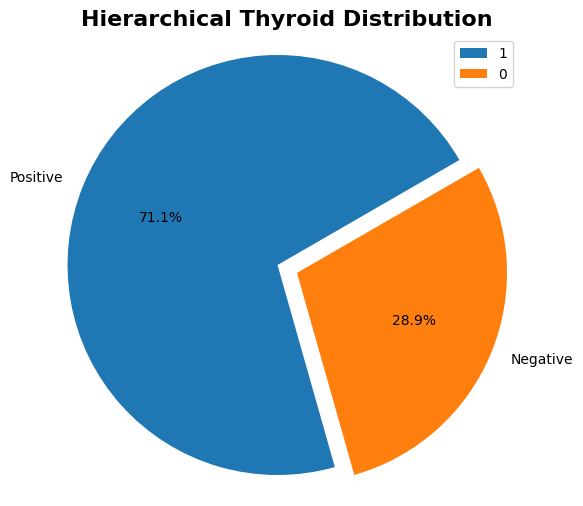

In [ ]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Cluster'].value_counts()[1]
    negative_count = data['Cluster'].value_counts()[0]
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Hierarchical Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Cluster'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

## **Data Preprocessing**

### **Check Missing Values**

In [ ]:
data.isnull().sum()

Age               0
sex               0
sick              0
pregnant          0
thyroidsurgery    0
goitre            0
tumor             0
TSH               0
T3                0
T4                0
T4U               0
FTI               0
Cluster           0
dtype: int64

### **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

0

## **Cross Validation**

### **Split Dataset**

In [ ]:
X=data.drop(['Cluster'],axis=1)
y=data.Cluster

In [ ]:
X.shape

(3639, 12)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)

(2911, 12)
(728, 12)


### **DT**

In [ ]:
# # setup parameter space
# parameters = {'criterion':['gini','entropy'],
#               'max_depth':np.arange(1,21).tolist()[0::2],
#               'min_samples_split':np.arange(2,11).tolist()[0::2],
#               'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# # create an instance of the grid search object
# g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# # conduct grid search over the parameter space
# start_time = time.time()
# g1.fit(X,y)
# duration = time.time() - start_time

# # show best parameter configuration found for classifier
# cls_params1 = g1.best_params_
# cls_params1

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 1,
 max_leaf_nodes=3,
 min_samples_split=2)
# model=g1.best_estimator_

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 98.63%
Fold 2 Accuracy: 97.80%
Fold 3 Accuracy: 98.35%
Fold 4 Accuracy: 97.80%
Fold 5 Accuracy: 96.84%

Average Accuracy: 97.88%

Fold 1:


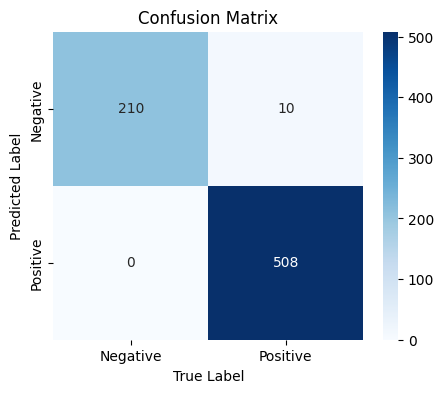


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       210
           1       1.00      0.98      0.99       518

    accuracy                           0.99       728
   macro avg       0.98      0.99      0.98       728
weighted avg       0.99      0.99      0.99       728


Fold 2:


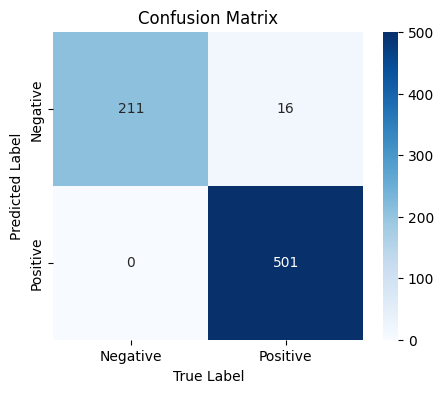


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       211
           1       1.00      0.97      0.98       517

    accuracy                           0.98       728
   macro avg       0.96      0.98      0.97       728
weighted avg       0.98      0.98      0.98       728


Fold 3:


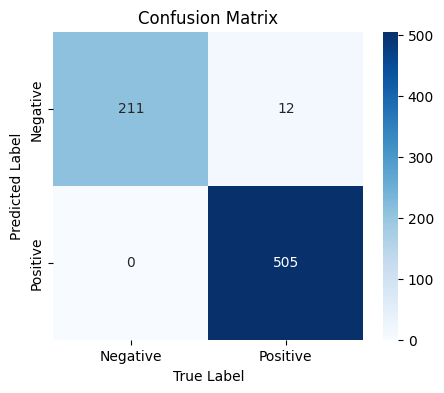


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       211
           1       1.00      0.98      0.99       517

    accuracy                           0.98       728
   macro avg       0.97      0.99      0.98       728
weighted avg       0.98      0.98      0.98       728


Fold 4:


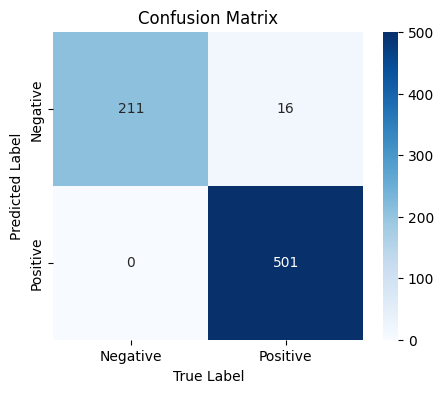


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       211
           1       1.00      0.97      0.98       517

    accuracy                           0.98       728
   macro avg       0.96      0.98      0.97       728
weighted avg       0.98      0.98      0.98       728


Fold 5:


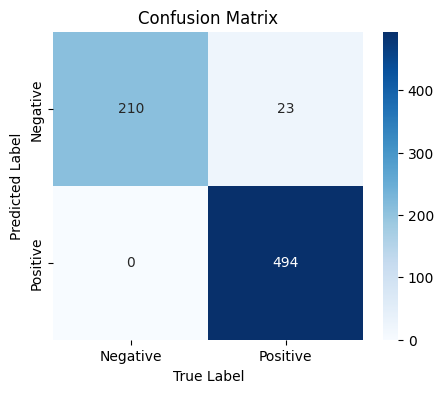


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       210
           1       1.00      0.96      0.98       517

    accuracy                           0.97       727
   macro avg       0.95      0.98      0.96       727
weighted avg       0.97      0.97      0.97       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg1=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg1:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **SVM**

In [ ]:
# Initialize the SVM model
model = SVC(kernel='sigmoid',C=100, gamma='auto')

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 71.15%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 Accuracy: 69.23%
Fold 3 Accuracy: 71.02%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Accuracy: 71.02%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 5 Accuracy: 71.11%

Average Accuracy: 70.71%

Fold 1:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


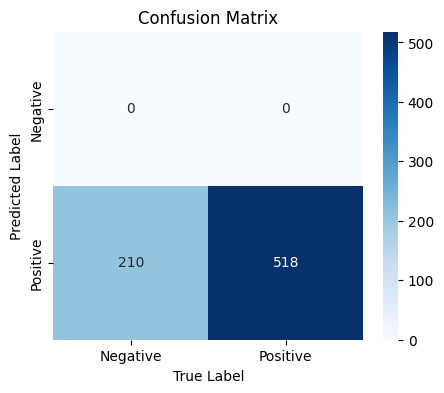


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       0.71      1.00      0.83       518

    accuracy                           0.71       728
   macro avg       0.36      0.50      0.42       728
weighted avg       0.51      0.71      0.59       728


Fold 2:


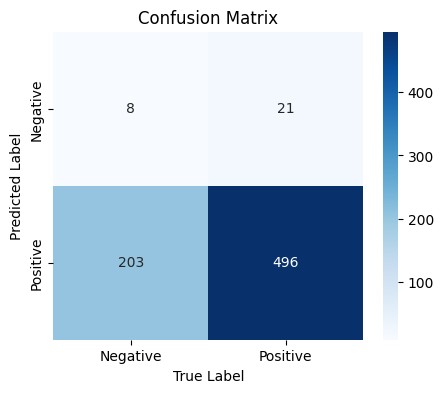


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.04      0.07       211
           1       0.71      0.96      0.82       517

    accuracy                           0.69       728
   macro avg       0.49      0.50      0.44       728
weighted avg       0.58      0.69      0.60       728


Fold 3:


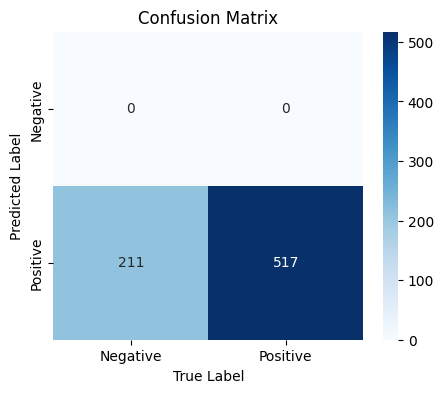


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.71      1.00      0.83       517

    accuracy                           0.71       728
   macro avg       0.36      0.50      0.42       728
weighted avg       0.50      0.71      0.59       728


Fold 4:


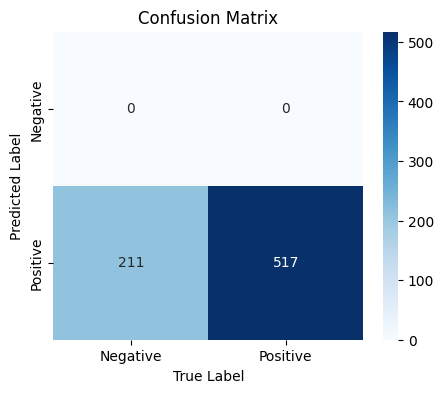


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.71      1.00      0.83       517

    accuracy                           0.71       728
   macro avg       0.36      0.50      0.42       728
weighted avg       0.50      0.71      0.59       728


Fold 5:


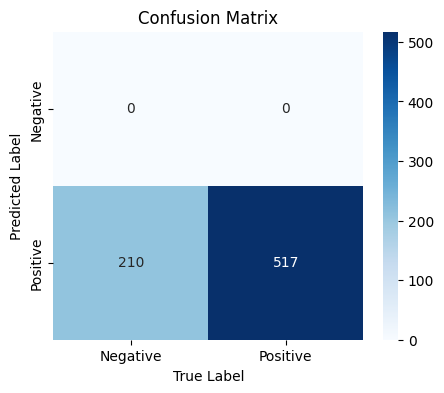


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       0.71      1.00      0.83       517

    accuracy                           0.71       727
   macro avg       0.36      0.50      0.42       727
weighted avg       0.51      0.71      0.59       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **KNN**

In [ ]:
# Initialize the KNN model
model = KNeighborsClassifier(metric='minkowski',p=2)

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 68.68%
Fold 2 Accuracy: 67.03%
Fold 3 Accuracy: 66.07%
Fold 4 Accuracy: 68.41%
Fold 5 Accuracy: 68.23%

Average Accuracy: 67.68%

Fold 1:


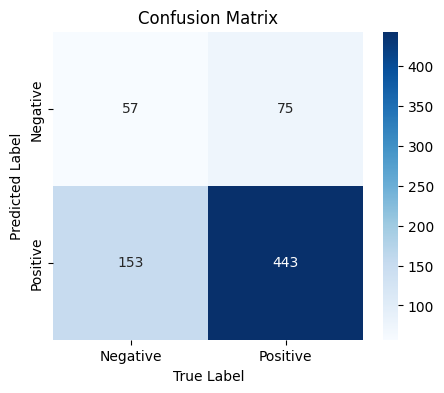


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.27      0.33       210
           1       0.74      0.86      0.80       518

    accuracy                           0.69       728
   macro avg       0.59      0.56      0.56       728
weighted avg       0.65      0.69      0.66       728


Fold 2:


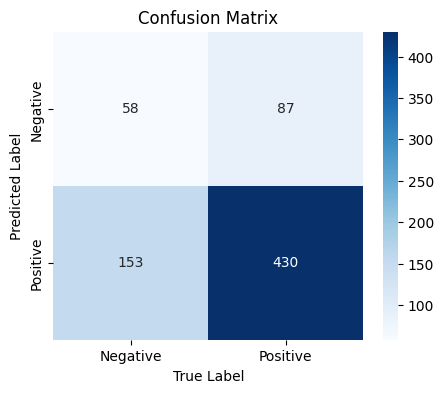


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.27      0.33       211
           1       0.74      0.83      0.78       517

    accuracy                           0.67       728
   macro avg       0.57      0.55      0.55       728
weighted avg       0.64      0.67      0.65       728


Fold 3:


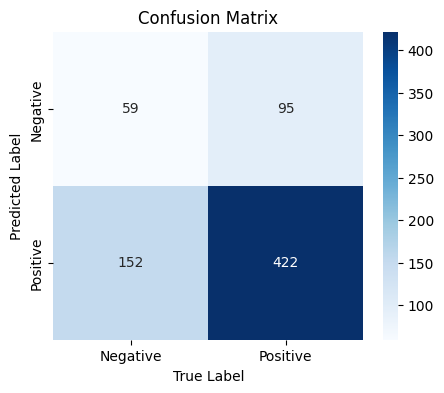


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.28      0.32       211
           1       0.74      0.82      0.77       517

    accuracy                           0.66       728
   macro avg       0.56      0.55      0.55       728
weighted avg       0.63      0.66      0.64       728


Fold 4:


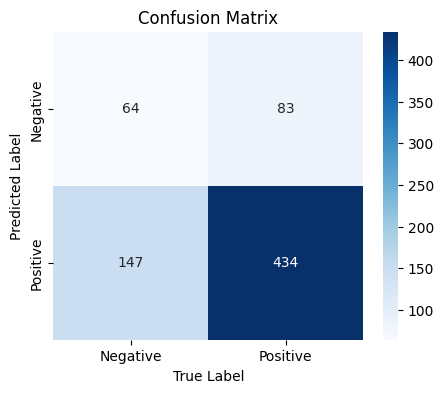


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.30      0.36       211
           1       0.75      0.84      0.79       517

    accuracy                           0.68       728
   macro avg       0.59      0.57      0.57       728
weighted avg       0.66      0.68      0.67       728


Fold 5:


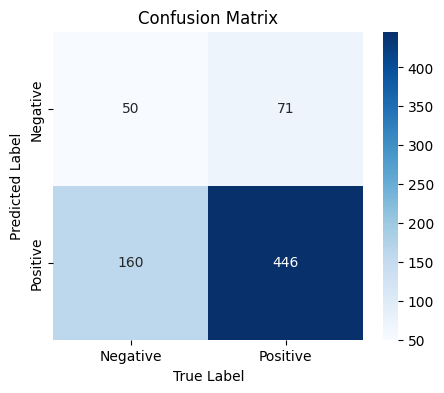


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.24      0.30       210
           1       0.74      0.86      0.79       517

    accuracy                           0.68       727
   macro avg       0.57      0.55      0.55       727
weighted avg       0.64      0.68      0.65       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg3=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg3:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **NB**

In [ ]:
# Initialize the NB model
# model= GaussianNB()
# model = BernoulliNB()
model = MultinomialNB()

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Fold 1 Accuracy: 82.14%
Fold 2 Accuracy: 77.47%
Fold 3 Accuracy: 84.07%
Fold 4 Accuracy: 79.95%
Fold 5 Accuracy: 86.93%

Average Accuracy: 82.11%

Fold 1:


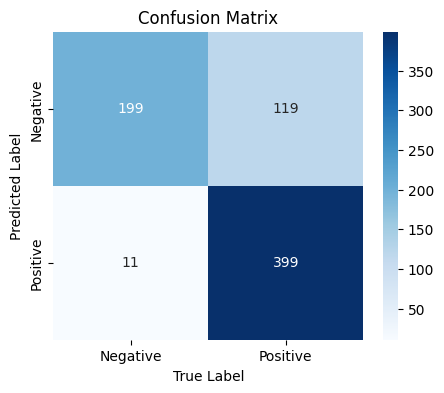


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.95      0.75       210
           1       0.97      0.77      0.86       518

    accuracy                           0.82       728
   macro avg       0.80      0.86      0.81       728
weighted avg       0.87      0.82      0.83       728


Fold 2:


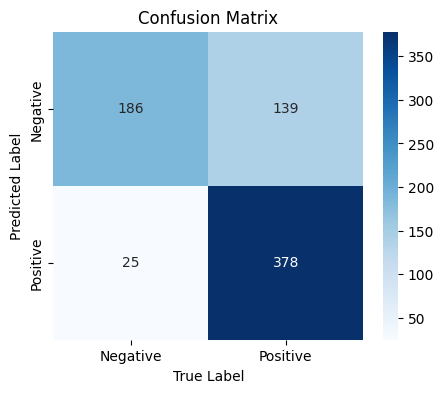


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       211
           1       0.94      0.73      0.82       517

    accuracy                           0.77       728
   macro avg       0.76      0.81      0.76       728
weighted avg       0.83      0.77      0.78       728


Fold 3:


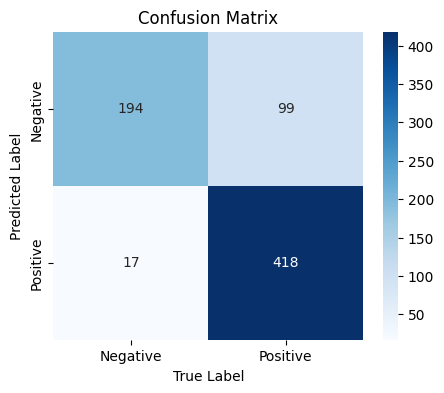


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       211
           1       0.96      0.81      0.88       517

    accuracy                           0.84       728
   macro avg       0.81      0.86      0.82       728
weighted avg       0.87      0.84      0.85       728


Fold 4:


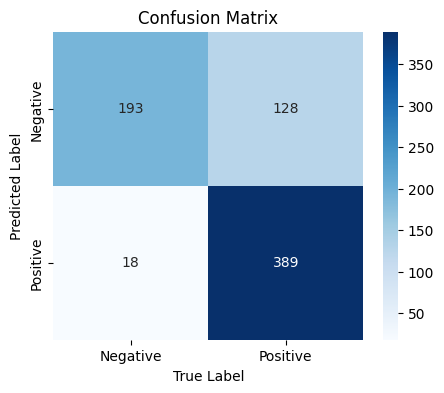


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.91      0.73       211
           1       0.96      0.75      0.84       517

    accuracy                           0.80       728
   macro avg       0.78      0.83      0.78       728
weighted avg       0.85      0.80      0.81       728


Fold 5:


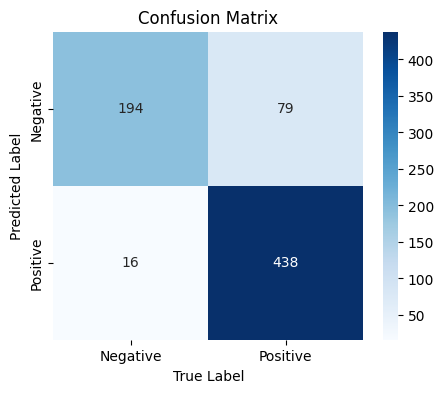


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       210
           1       0.96      0.85      0.90       517

    accuracy                           0.87       727
   macro avg       0.84      0.89      0.85       727
weighted avg       0.89      0.87      0.87       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg4=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg4:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

### **ANN**

In [ ]:
# Initialize the ANN model
model = tf.keras.models.Sequential()

# Adding layers to ANN model
model.add(tf.keras.layers.Dense(units=12,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

23/23 [==============================] - 0s 2ms/step
Fold 1 Accuracy: 71.15%
23/23 [==============================] - 0s 2ms/step
Fold 2 Accuracy: 84.48%
23/23 [==============================] - 0s 3ms/step
Fold 3 Accuracy: 98.63%
23/23 [==============================] - 0s 2ms/step
Fold 4 Accuracy: 99.86%
23/23 [==============================] - 0s 1ms/step
Fold 5 Accuracy: 100.00%

Average Accuracy: 90.82%

Fold 1 :


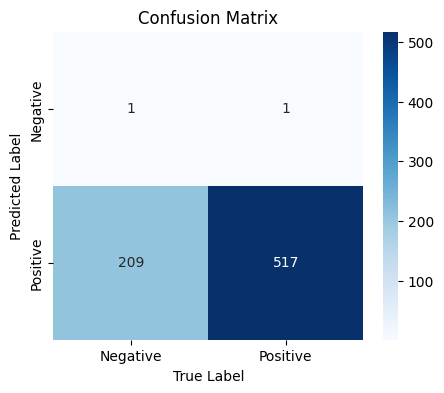


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       210
           1       0.71      1.00      0.83       518

    accuracy                           0.71       728
   macro avg       0.61      0.50      0.42       728
weighted avg       0.65      0.71      0.59       728


Fold 2 :


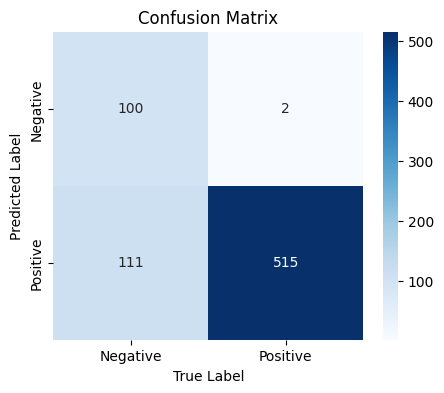


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.47      0.64       211
           1       0.82      1.00      0.90       517

    accuracy                           0.84       728
   macro avg       0.90      0.74      0.77       728
weighted avg       0.87      0.84      0.83       728


Fold 3 :


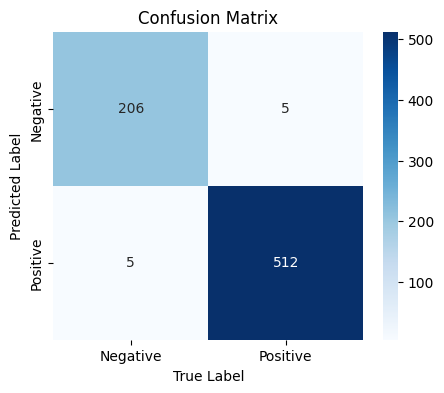


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       211
           1       0.99      0.99      0.99       517

    accuracy                           0.99       728
   macro avg       0.98      0.98      0.98       728
weighted avg       0.99      0.99      0.99       728


Fold 4 :


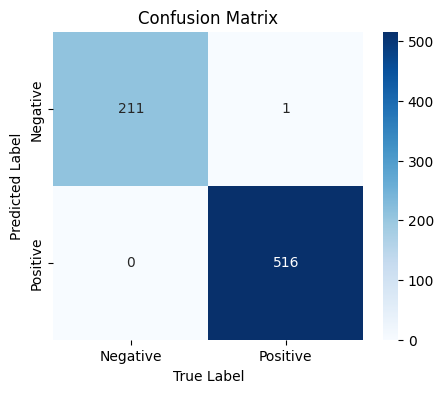


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       517

    accuracy                           1.00       728
   macro avg       1.00      1.00      1.00       728
weighted avg       1.00      1.00      1.00       728


Fold 5 :


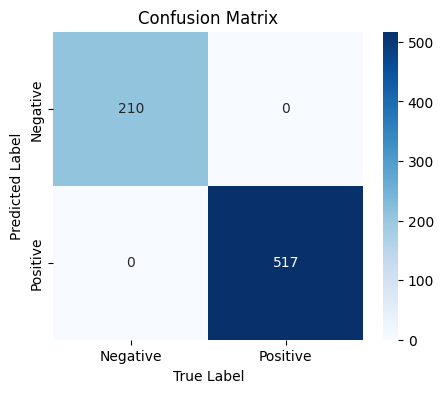


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       517

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []

# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Use these indexes to split the data into train and test dataframes
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test)>0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)

# Print average accuracy across all folds
Avg5=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg5:.2%}')
for i, (conf_matrix, classification_rep) in enumerate(zip(conf_matrices, classification_reports), 1):
    print(f'\nFold {i} :')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep}')

## **Comparison**

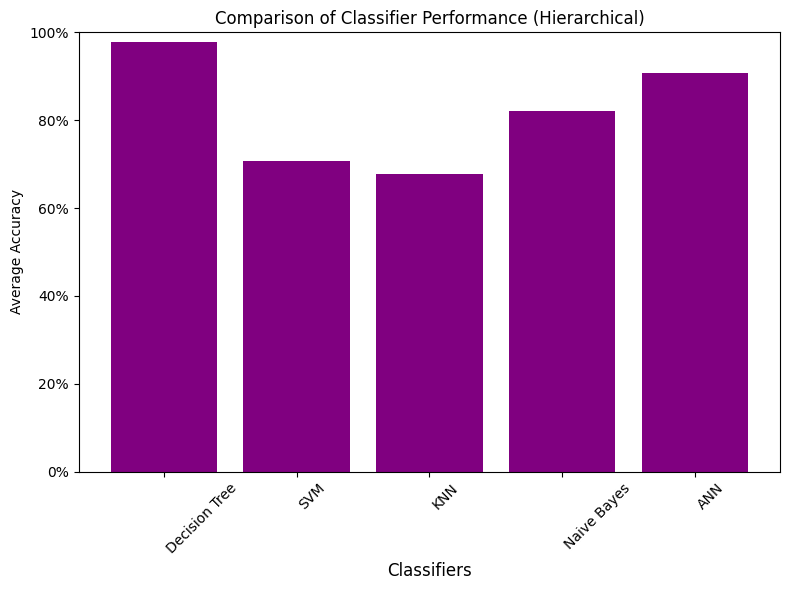

In [ ]:
# List of classifier names
classifiers = ['Decision Tree', 'SVM', 'KNN', 'Naive Bayes', 'ANN']

# List of average accuracies
average_accuracies = [Avg1 * 100, Avg2 * 100, Avg3 * 100, Avg4 * 100, Avg5 * 100]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, average_accuracies, color='purple')
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=10)
plt.title('Comparison of Classifier Performance (Hierarchical)')
plt.xticks(rotation=45, ha='left')
def percentage(x, pos):
    return f'{x:.0f}%'

formatter = FuncFormatter(percentage)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.ylim(0, 100)  # Set y-axis limit to ensure consistency
plt.tight_layout()
plt.show()